In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil
pd.set_option('display.max_columns', None)
from rapidfuzz import process, fuzz

# Metadata

#### Attribute Description
- carID - An attribute that contains an identifier for each car.
- Brand - The car’s main brand (e.g. Ford, Toyota).
- model - The car model.
- year - The year of Registration of the Car.
- mileage - The total reported distance travelled by the car (in miles).
- tax - The amount of road tax (in £) that, in 2020, was applicable to the car in question. 
- fuelType - Type of Fuel used by the car (Diesel, Petrol, Hybrid, Electric).
- mpg - Average Miles per Gallon.
- engineSize - Size of Engine in liters (Cubic Decimeters).
- paintQuality% - The mechanic’s assessment of the cars’ overall paint quality and hull integrity (filled by the mechanic during evaluation). 
- previousOwners - Number of previous registered owners of the vehicle.
- hasDamage - Boolean marker filled by the seller at the time of registration stating whether the car is damaged or not.
- price - The car’s price when purchased by Cars 4 You (in £).

# Reading the Data

In [2]:
df_train = pd.read_csv("project_data/train.csv")
df_test = pd.read_csv("project_data/test.csv")

# 1. Geral Analysis

In [3]:
df_train.tail(20)

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
75953,71932,VW,golf sv,2020.0,21490,Semi-Auto,1177.0,Petrol,145.0,42.80000,1.5,36.0,4.0,0.0
75954,28693,Ford,Kuga,2017.0,16495,Manual,25352.0,Diesel,145.0,60.10000,2.0,51.0,4.0,0.0
75955,53707,Toyota,Yaris,2017.0,10498,Manual,9857.0,Petrol,30.0,55.00000,1.3,58.0,1.0,0.0
75956,5311,Audi,Q5,2019.0,37900,Semi-Auto,1027.0,Diesel,150.0,38.20000,2.0,31.0,2.0,0.0
75957,67969,VW,T-Roc,2019.0,32490,Automatic,9475.0,Petrol,145.0,32.50000,2.0,62.0,3.0,0.0
75958,64925,Opel,Corsa,2017.0,7299,Manual,41616.0,Petrol,20.0,61.40000,1.0,82.0,2.0,0.0
75959,62955,Opel,Corsa,2017.0,7325,Manual,36154.0,Petrol,150.0,55.40000,1.4,79.0,4.0,0.0
75960,59735,Opel,Grandland X,2018.0,16499,Automatic,13562.0,Petrol,145.0,54.30000,1.2,65.0,2.0,0.0
75961,769,Audi,A1,2016.0,10790,Manual,41914.0,Petrol,0.0,67.30000,1.0,39.0,4.0,0.0
75962,64820,Opel,Astra,2016.0,8990,Manual,9370.0,NaN,20.0,64.20000,1.0,43.0,4.0,0.0


#### First Insights
- The Data Set has 75973 rows and 14 columns.
- Transmission contains "incorrect" values such as "anual" that should be "Manual".
- FuelType contains typos like "etrol", "iesel", "Petro" that should be corrected to "Petrol" and "Diesel".
- Tax column contains missing (NaN) values.
- PreviousOwners includes negative values which are impossible.

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


#### Info() Obsevations
- All columns contain missing values except for carID and price.
- Year is stored as a float but should be an integer (int).
- Mileage is stored as a float but should be an integer (int).
- PreviousOwners is stored as a float but should be an integer (int).
- HasDamage is stored as a float but should be a boolean (bool).

In [5]:
df_train.describe()

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


#### describe() Observations
- Mileage has negative values (min is -58,540.57) which are impossible.
- Tax has negative values (min is -91.12) which are impossible.
- MPG has negative values (min is -43.42) which are invalid.
- EngineSize has negative values (min is -0.10) which are invalid.
- PaintQuality% has values above 100% and negatives which represent incorrect data.
- PreviousOwners has negative values (min is - i2.35) which are invalid.
- Year maximum is 2024.12 which is likely a typo or float conversion error.

# 2. Univariate Analysis

## 2.1. CarID

Checking Nans.

In [6]:
df_train['carID'].isna().sum()

np.int64(0)

Checking Nans.

Cheking duplicates IDs.

In [7]:
df_train['carID'].duplicated().sum()

np.int64(0)

In [8]:
df_train['carID'].nunique()

75973

#### CarID Observations
- No Nan values found for CarID.
- No CarID duplicates found.
- No issues for carID
- Seems a useless variable for predicting, but still will not be removed now

## 2.2. Brand & Model

### 2.2.1 Brand

Checking Nans.

In [9]:
df_train['Brand'].isna().sum()

np.int64(1521)

Checking Inconsistences.

In [10]:
df_train['Brand'].unique()

array(['VW', 'Toyota', 'Audi', 'Ford', 'BMW', 'Skoda', 'Opel', 'Mercedes',
       'FOR', 'mercedes', 'Hyundai', 'w', 'ord', 'MW', 'bmw', nan,
       'yundai', 'BM', 'Toyot', 'udi', 'Ope', 'AUDI', 'V', 'opel', 'pel',
       'For', 'pe', 'Mercede', 'audi', 'MERCEDES', 'OPEL', 'koda', 'FORD',
       'Hyunda', 'W', 'Aud', 'vw', 'hyundai', 'skoda', 'ford', 'TOYOTA',
       'ercedes', 'oyota', 'toyota', 'SKODA', 'Skod', 'HYUNDAI', 'kod',
       'v', 'for', 'SKOD', 'aud', 'KODA', 'PEL', 'yunda', 'or', 'UDI',
       'OYOTA', 'HYUNDA', 'mw', 'OPE', 'mercede', 'ERCEDES', 'ercede',
       'TOYOT', 'MERCEDE', 'ORD', 'ud', 'ope', 'AUD', 'hyunda', 'skod',
       'toyot'], dtype=object)

The 'Brand' column has many inconsistencies in uppercase/lowercase letters and spelling errors.

In [11]:
# Normalizing all strings to lowercase.
df_train['Brand'] = df_train['Brand'].str.lower()

In [12]:
# Cheking all the unique values of 'Brand'.
df_train['Brand'].unique()

array(['vw', 'toyota', 'audi', 'ford', 'bmw', 'skoda', 'opel', 'mercedes',
       'for', 'hyundai', 'w', 'ord', 'mw', nan, 'yundai', 'bm', 'toyot',
       'udi', 'ope', 'v', 'pel', 'pe', 'mercede', 'koda', 'hyunda', 'aud',
       'ercedes', 'oyota', 'skod', 'kod', 'yunda', 'or', 'ercede', 'ud'],
      dtype=object)

In [13]:
# Cheking all the unique values of 'Brand' sorted alphabetically.
sorted(df_train['Brand'].dropna().unique())

['aud',
 'audi',
 'bm',
 'bmw',
 'ercede',
 'ercedes',
 'for',
 'ford',
 'hyunda',
 'hyundai',
 'kod',
 'koda',
 'mercede',
 'mercedes',
 'mw',
 'ope',
 'opel',
 'or',
 'ord',
 'oyota',
 'pe',
 'pel',
 'skod',
 'skoda',
 'toyot',
 'toyota',
 'ud',
 'udi',
 'v',
 'vw',
 'w',
 'yunda',
 'yundai']

### 2.2.2. Model

Cheking Nans.

In [14]:
df_train['model'].isna().sum()

np.int64(1517)

Checking Inconsistences.

In [15]:
# Checking the unique values of the 'model column.
df_train['model'].dropna().unique()

array([' Golf', ' Yaris', ' Q2', ' FIESTA', ' 2 Series', '3 Series',
       ' A3', ' Octavia', ' Passat', ' Focus', ' Insignia', ' A Clas',
       ' Q3', ' Fabia', ' A Class', ' Ka+', ' 3 Series', ' GLC Class',
       ' I30', ' C Class', ' Polo', ' E Class', ' C Clas', ' Q5', ' Up',
       ' Fiesta', ' C-HR', ' Mokka X', ' Corsa', ' Astra', ' TT',
       ' 5 Series', ' Aygo', ' 4 Series', ' SLK', ' Viva', ' T-Roc',
       'Focus', ' EcoSport', ' Tucson', ' EcoSpor', ' X-CLASS',
       ' CL Class', ' IX20', ' i20', ' Rapid', ' a1', ' Auris', ' sharan',
       ' I20', ' Adam', ' X3', ' A8', ' GLS Class', ' B-MAX', ' A4',
       ' Kona', ' I10', ' A1', ' Mokka', ' fiesta', ' S-MAX', ' X2',
       ' Crossland X', ' Tiguan', ' A5', ' GLE Class', ' C CLASS',
       ' mokka x', ' Zafira', ' Ioniq', ' A6', ' Mondeo', ' Yeti Outdoor',
       ' X1', 'POLO', ' INSIGNIA', ' Scala', ' S Class', ' 1 Series',
       ' Kamiq', ' Kuga', ' Tourneo Connect', ' Q7', ' GLA Class',
       ' Arteon', ' polo'

Several typing errors are identified, such as missing letters and extra spaces at the beginning of strings.

In [16]:
# Checking the unique values of the 'model' column in alphabetical order.
sorted(df_train['model'].dropna().unique())[:20]

[' 1 SERIE',
 ' 1 SERIES',
 ' 1 Serie',
 ' 1 Series',
 ' 1 serie',
 ' 1 series',
 ' 2 SERIES',
 ' 2 Serie',
 ' 2 Series',
 ' 2 serie',
 ' 2 series',
 ' 3 SERIES',
 ' 3 Serie',
 ' 3 Series',
 ' 3 serie',
 ' 3 series',
 ' 4 SERIES',
 ' 4 Serie',
 ' 4 Series',
 ' 4 serie']

Since some values are written in lowercase and others in uppercase for the same car model, we will convert everything to lowercase to simplify the analysis.

In [17]:
df_train['model'] = df_train['model'].str.lower().str.replace('-', ' ')

Building a function 'remove_leading_spaces' to remove initial empty spaces.

In [18]:
# Function to remove leading space if it exists.
def remove_leading_space(s):
    if isinstance(s, str) and s.startswith(' '):
        return s[1:]  # remove the first character.
    return s

# Apply the function to the 'model' column.
df_train['model'] = df_train['model'].apply(remove_leading_space)

In [19]:
# Show the ordered unique values of model column after removing leading spaces.
sorted(df_train['model'].dropna().unique())

['1 serie',
 '1 series',
 '2 serie',
 '2 series',
 '200',
 '220',
 '230',
 '3 serie',
 '3 series',
 '4 serie',
 '4 series',
 '5 serie',
 '5 series',
 '6 serie',
 '6 series',
 '7 serie',
 '7 series',
 '8 serie',
 '8 series',
 'a',
 'a clas',
 'a class',
 'a1',
 'a2',
 'a3',
 'a4',
 'a5',
 'a6',
 'a7',
 'a8',
 'accent',
 'ada',
 'adam',
 'agila',
 'amaro',
 'amarok',
 'ampera',
 'antara',
 'arteo',
 'arteon',
 'astr',
 'astra',
 'auri',
 'auris',
 'avensis',
 'ayg',
 'aygo',
 'b clas',
 'b class',
 'b ma',
 'b max',
 'beetl',
 'beetle',
 'c clas',
 'c class',
 'c h',
 'c hr',
 'c ma',
 'c max',
 'caddy',
 'caddy life',
 'caddy maxi',
 'caddy maxi lif',
 'caddy maxi life',
 'california',
 'camry',
 'caravell',
 'caravelle',
 'cascada',
 'cc',
 'citig',
 'citigo',
 'cl clas',
 'cl class',
 'cla class',
 'clc class',
 'clk',
 'cls clas',
 'cls class',
 'combo lif',
 'combo life',
 'coroll',
 'corolla',
 'cors',
 'corsa',
 'crossland ',
 'crossland x',
 'e clas',
 'e class',
 'ecospor',
 'ec

### 2.2.3. Fuzzy Matching

- To correct the spelling errors in the brand and model columns we did a webscrapping to the "autotrader" website to get all the brands and models (and the pairs brand-model) to do a fuzzy matching between the train dataset and this new dataset (with all the brands and models available)(Scraping on a different notebook).

In [20]:
catalog = pd.read_csv('project_data/make_model_catalog.csv')

In [21]:
catalog.head(5)

,make,model
0,AC,Cobra
1,AC,Dax Cobra
2,AK,Cobra
3,Abarth,124 Spider
4,Abarth,500


In [22]:
catalog['make'] = catalog['make'].str.lower().str.strip()
catalog['model'] = catalog['model'].str.lower().str.replace('-', ' ')
catalog['model'] = catalog['model'].apply(remove_leading_space)

In [23]:
cat = catalog.copy()
df = df_train.copy()

In [24]:
def rf_top1(query, choices, scorer=fuzz.ratio):
    match = process.extractOne(query, choices, scorer=scorer)
    if match is None:
        return None, 0.0
    return match[0], match[1]

In [25]:
makes_norm = cat["make"].unique().tolist()
brand_uniques = df["Brand"].unique().tolist()

In [26]:
brand_map = {}
for br in brand_uniques:
    best, sc = rf_top1(br, makes_norm, scorer=fuzz.ratio)  # ou fuzz.WRatio se houver muito ruído
    brand_map[br] = {'match':best, 'score': sc}

In [27]:
brand_map

{'vw': {'match': 'vw', 'score': 100.0},
 'toyota': {'match': 'toyota', 'score': 100.0},
 'audi': {'match': 'audi', 'score': 100.0},
 'ford': {'match': 'ford', 'score': 100.0},
 'bmw': {'match': 'bmw', 'score': 100.0},
 'skoda': {'match': 'skoda', 'score': 100.0},
 'opel': {'match': 'opel', 'score': 100.0},
 'mercedes': {'match': 'mercedes', 'score': 100.0},
 'for': {'match': 'ford', 'score': 85.71428571428572},
 'hyundai': {'match': 'hyundai', 'score': 100.0},
 'w': {'match': 'vw', 'score': 66.66666666666667},
 'ord': {'match': 'ford', 'score': 85.71428571428572},
 'mw': {'match': 'bmw', 'score': 80.0},
 nan: {'match': None, 'score': 0.0},
 'yundai': {'match': 'hyundai', 'score': 92.3076923076923},
 'bm': {'match': 'bmw', 'score': 80.0},
 'toyot': {'match': 'toyota', 'score': 90.9090909090909},
 'udi': {'match': 'audi', 'score': 85.71428571428572},
 'ope': {'match': 'opel', 'score': 85.71428571428572},
 'v': {'match': 'vw', 'score': 66.66666666666667},
 'pel': {'match': 'opel', 'score'

In [28]:
THRESH_BRAND = 75
filtered_map = {
    key: nested_dict['match']
    for key, nested_dict in brand_map.items()
    if nested_dict['score'] >= THRESH_BRAND
}
filtered_map['v'] = 'vw'

In [29]:
df["brand_clean"] = df['Brand'].map(filtered_map)
df

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,brand_clean
0,69512,vw,golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0,vw
1,53000,toyota,yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0,toyota
2,6366,audi,q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0,audi
3,29021,ford,fiesta,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0,ford
4,10062,bmw,2 series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0,bmw
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,mercedes,c class,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0,mercedes
75969,6265,audi,q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0,audi
75970,54886,toyota,aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0,toyota
75971,860,audi,q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0,audi


In [30]:
# index de modelos por make normalizada
models_by_make = {
    mk: (
        sorted(g["model"].unique().tolist())    )
    for mk, g in cat.groupby("make")
}

In [31]:
mod_by_fil_make = [
    sorted(g["model"].unique().tolist())
    for mk, g in cat.groupby("make")
    if mk in list(set(filtered_map.values()))
]
mod_by_fil_make = [item for sublist in mod_by_fil_make for item in sublist]

In [32]:
def match_model_in_make(model, brand_clean, brand):
    if pd.isna(brand):
        all_models = mod_by_fil_make
        best, sc = rf_top1(model, all_models, scorer=fuzz.ratio)
        if sc >= THRESH_MODEL_NO_BRAND:
            return best, sc
        else:
            return None, 0.0
    if pd.isna(brand_clean):
        return None, 0.0
    else:
        models_make = models_by_make[brand_clean]
        best, sc = rf_top1(model, models_make, scorer=fuzz.ratio) 
        if sc > THRESH_MODEL:
            return best, sc
        else:
            return None, 0.0

THRESH_MODEL = 70.0
THRESH_MODEL_NO_BRAND = 80
tmp = df.apply(lambda r: match_model_in_make(r["model"], r["brand_clean"], r["Brand"]), axis=1)

In [33]:
df["model_clean_tmp"] = [t[0] for t in tmp]
df["model_score_inmake"] = [t[1] for t in tmp]

In [34]:
df.loc[(df['model_score_inmake'] > 0) & (df['Brand'].isna())]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,brand_clean,model_clean_tmp,model_score_inmake
56,66591,NaN,t roc,2018.0,23000,Semi-Auto,584.0,Petrol,150.0,41.5,2.0,79.0,1.0,0.0,NaN,t roc,100.0
75,5034,NaN,a3,2016.0,11871,Manual,52519.0,Diesel,20.0,72.4,1.6,60.0,2.0,0.0,NaN,a3,100.0
81,33153,NaN,i20,2020.0,13966,MANUAL,3500.0,Petrol,145.0,47.9,1.0,41.0,2.0,0.0,NaN,i20,100.0
176,45338,NaN,cl class,2020.0,54995,Semi-Auto,NaN,Petrol,145.0,33.2,2.0,61.0,4.0,0.0,NaN,cl class,100.0
191,66712,NaN,polo,2016.0,8650,Manual,32800.0,Petrol,20.0,60.1,1.0,54.0,4.0,0.0,NaN,polo,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75632,72615,NaN,golf,2015.0,11750,Manual,79000.0,Diesel,20.0,67.3,2.0,68.0,0.0,0.0,NaN,golf,100.0
75720,3436,NaN,q5,2015.0,21995,Semi-Auto,18188.0,Diesel,200.0,47.1,2.0,84.0,3.0,0.0,NaN,q5,100.0
75810,7392,NaN,a5,2019.0,31490,Automatic,10.0,Petrol,145.0,39.8,2.0,70.0,1.0,0.0,NaN,a5,100.0
75828,13545,NaN,5 series,2019.0,26380,Semi-Auto,7609.0,Diese,145.0,65.7,2.0,67.0,3.0,0.0,NaN,5 series,100.0


In [35]:
pairs_df = cat[["make","model"]].copy()

In [36]:
def fallback_pair(row):
    if not pd.isna(row["brand_clean"]) or pd.isna(row["Brand"]) or pd.isna(row["model"]):
        return None, None, 0.0
    mk_cands = [m for (m,_,_) in process.extract(row["Brand"], makes_norm, scorer=fuzz.ratio, limit=5)]
    if not mk_cands:
        return None, None, 0.0
    sub = pairs_df[pairs_df["make"].isin(mk_cands)].copy()
    q = (row["Brand"] + " " + row["model"])
    choices = (sub["make"] + " " + sub["model"]).tolist()
    best_pair, score = rf_top1(q, choices, scorer=fuzz.ratio)
    hit = sub.loc[(sub["make"] + " " + sub["model"])==best_pair].iloc[0]
    return hit['make'], hit['model'], score

In [37]:
fb = df.apply(fallback_pair, axis=1, result_type="expand")

In [38]:
df["pair_make"], df["pair_model"], df["pair_score"] = fb[0], fb[1], fb[2]

In [39]:
df.loc[(df['pair_score'] > 0) & (df['pair_score'] < 70)]

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage,brand_clean,model_clean_tmp,model_score_inmake,pair_make,pair_model,pair_score
54276,67383,w,u,2012.0,5499,Manual,54196.0,Petrol,20.0,60.1,1.0,63.0,2.0,0.0,NaN,None,0.0,vw,up!,66.666667


In [40]:
THRESH_PAIR = 65

In [41]:
def pick_brand(row):
    if pd.isna(row["brand_clean"]):
        if row["pair_score"] >= THRESH_PAIR:
            return row["pair_make"]
        else:
            return None
    else:
        return row["brand_clean"]

def pick_model(row):
    if pd.isna(row["model_clean_tmp"]):
        if row["pair_score"] >= THRESH_PAIR:
            return row["pair_model"]
        else:
            return None
    else:
        return row["model_clean_tmp"]

df["brand_final"] = df.apply(pick_brand, axis=1)
df["model_final"] = df.apply(pick_model, axis=1)

In [42]:
MIN_SUPPORT = 2          

gb = df.groupby("model_final")
n_brands_by_model = gb["brand_final"].nunique()

In [43]:
count_by_pair = df.groupby(["model_final","brand_final"]).size().sort_values(ascending=False)

In [44]:
non_ambiguous_models = n_brands_by_model[n_brands_by_model == 1].index

In [45]:
top_brand_per_model = (
    count_by_pair.reset_index().rename(columns={0:"n"})
    .loc[lambda d: d["model_final"].isin(non_ambiguous_models)]
)

In [46]:
top_brand_per_model = top_brand_per_model.loc[top_brand_per_model['n'] >= MIN_SUPPORT]
model2brand_key = dict(zip(top_brand_per_model["model_final"], top_brand_per_model["brand_final"]))

In [47]:
df.loc[df['Brand'].isna(), "brand_final"] = df.loc[df['Brand'].isna(), "model_final"].map(model2brand_key)

In [48]:
df_train = df[['carID', 'brand_final', 'model_final', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'tax', 'mpg', 'engineSize','paintQuality%', 'previousOwners','hasDamage']].rename(columns={'brand_final':'brand', 'model_final':'model'}).copy()
df_train

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,vw,golf,2016.0,22290,Semi-Auto,28421.0,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,toyota,yaris,2019.0,13790,Manual,4589.0,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,audi,q2,2019.0,24990,Semi-Auto,3624.0,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,ford,fiesta,2018.0,12500,anual,9102.0,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,bmw,2 series,2019.0,22995,Manual,1000.0,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75968,37194,mercedes,c class,2015.0,13498,Manual,14480.0,etrol,125.0,53.300000,2.0,78.0,0.000000,0.0
75969,6265,audi,q3,2013.0,12495,Semi-Auto,52134.0,Diesel,200.0,47.900000,2.0,38.0,2.000000,0.0
75970,54886,toyota,aygo,2017.0,8399,Automatic,11304.0,Petrol,145.0,67.000000,1.0,57.0,3.000000,0.0
75971,860,audi,q3,2015.0,12990,Manual,69072.0,iesel,125.0,60.100000,2.0,74.0,2.000000,0.0


Visualizing Brand on a Countplot

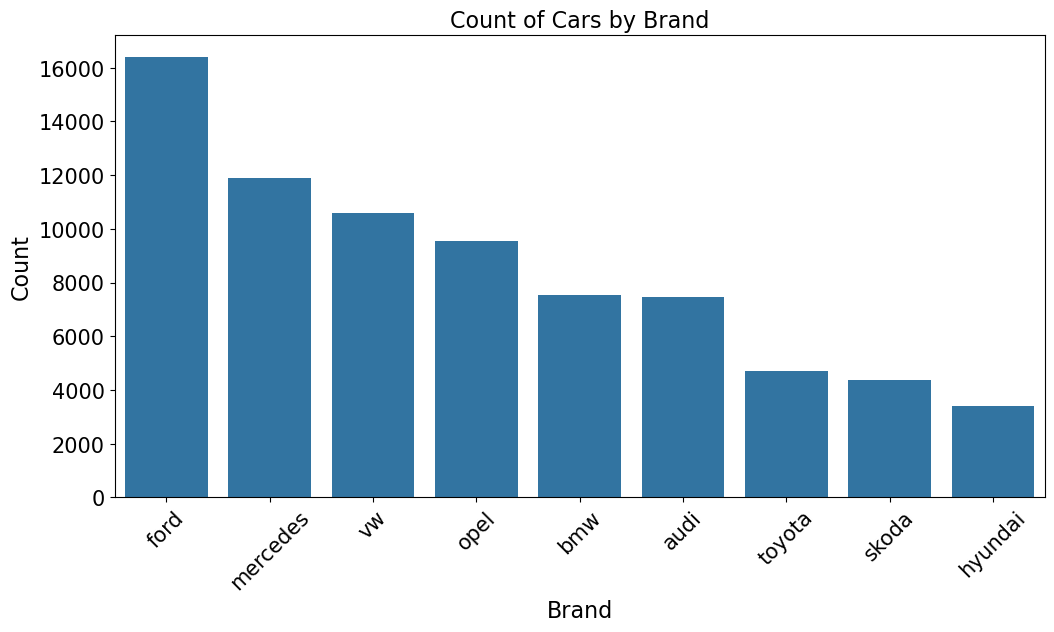

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df_train, x='brand', order=df_train['brand'].value_counts().index)

plt.xticks(rotation=45, fontsize=15) 
plt.yticks(fontsize=15)               
plt.title('Count of Cars by Brand', fontsize=16) 
plt.xlabel('Brand', fontsize=16)     
plt.ylabel('Count', fontsize=16)     
plt.show()

#### Brand Observations
- Missing values: 1,521.
- Data cleaning: inconsistencies in uppercase/lowercase and spelling errors corrected.
- Most frequent brands: Ford is the most common, followed by Mercedes and VW.

In [50]:
# Checking the number of NaN values in the 'model' column after applying the replacements.
df_train['model'].isna().sum()

np.int64(1721)

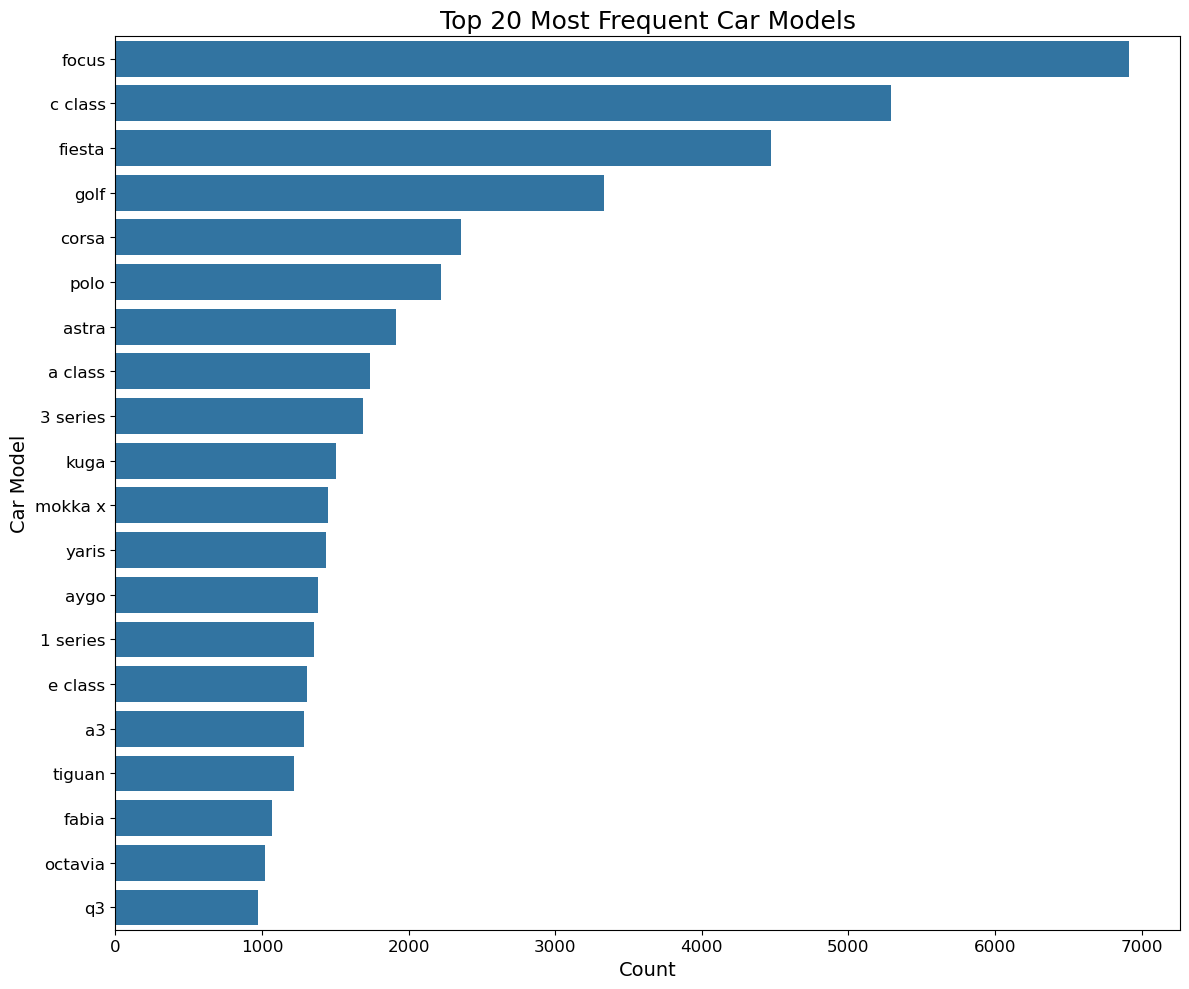

In [51]:
# Select the top 20 most frequent car models.
top_models = df_train['model'].value_counts().nlargest(20).index

plt.figure(figsize=(12, 10))

sns.countplot(
    y='model',
    data=df_train,
    order=top_models,
)

plt.title('Top 20 Most Frequent Car Models', fontsize=18)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Car Model', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

#### Model Observations
- Typing issues fixed: each value was meticulously evaluated and manually corrected, including removal of extra whitespace.
- NaN values: initially 1,517, now 1,721 after cleaning.
- Most frequent models: visually, Focus is the most common, followed by C-Class and Fiesta.

#### Model + Brand
 
 - At first glance we will have 2 options: either build a model that takes into consideration combinations of brand+model or just takes into consideration the brand.
 - If we choose the 1st one we will have to worry about the trap of having to many variables (curse of dimensionality)

## 2.4. Year

Cheking Nans.

In [52]:
df_train['year'].isna().sum()

np.int64(1491)

Checking Inconsistences.

In [53]:
df_train['year'].unique()

array([2016.        , 2019.        , 2018.        , 2014.        ,
       2017.        , 2020.        , 2013.        ,           nan,
       2015.        , 2023.36707842, 2011.        , 2012.        ,
       2023.1169636 , 2003.        , 2009.        , 2007.        ,
       2005.        , 2011.11118842, 2011.21085349, 2023.97731126,
       2004.        , 2010.        , 2010.56500919, 2008.        ,
       2024.12175905, 2006.        , 2023.60527574, 2023.38982198,
       2010.67696784, 2001.        , 2000.        , 2023.26798867,
       2010.26863473, 2010.37154646, 2002.        , 2022.69668507,
       2009.81675711, 2010.7464032 , 2012.69574039, 1996.        ,
       1998.        , 2022.87800554, 1970.        , 1999.        ,
       1997.        ])

These decimal places are probably caused by converting dates to floats. The safest fix is to round to the nearest whole number.

In [54]:
df_train['year'] = df_train['year'].apply(lambda x: int(round(x)) if pd.notnull(x) else np.nan)

In [55]:
df_train['year'].unique()

array([2016., 2019., 2018., 2014., 2017., 2020., 2013.,   nan, 2015.,
       2023., 2011., 2012., 2003., 2009., 2007., 2005., 2024., 2004.,
       2010., 2008., 2006., 2001., 2000., 2002., 1996., 1998., 1970.,
       1999., 1997.])

Now we can convert the dtype float to int.

In [56]:
df_train['year'] = df_train['year'].astype('Int64')

In [57]:
df_train['year'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 75973 entries, 0 to 75972
Series name: year
Non-Null Count  Dtype
--------------  -----
74482 non-null  Int64
dtypes: Int64(1)
memory usage: 667.9 KB


Visualizing year on a histogram and boxplot.

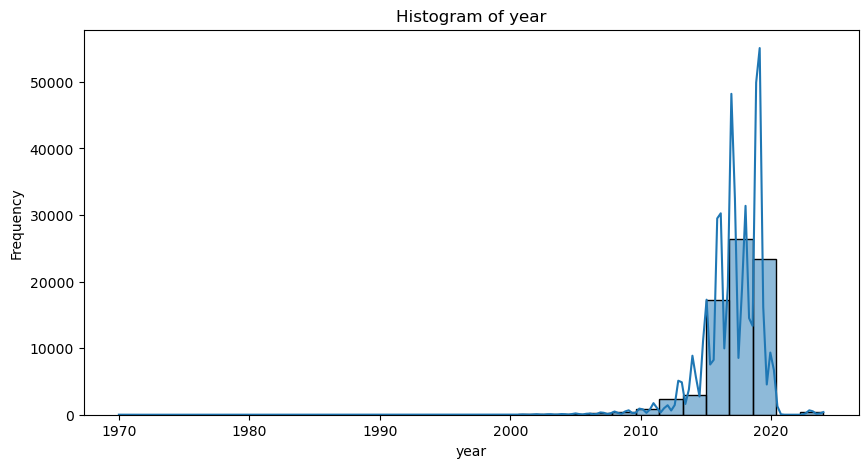

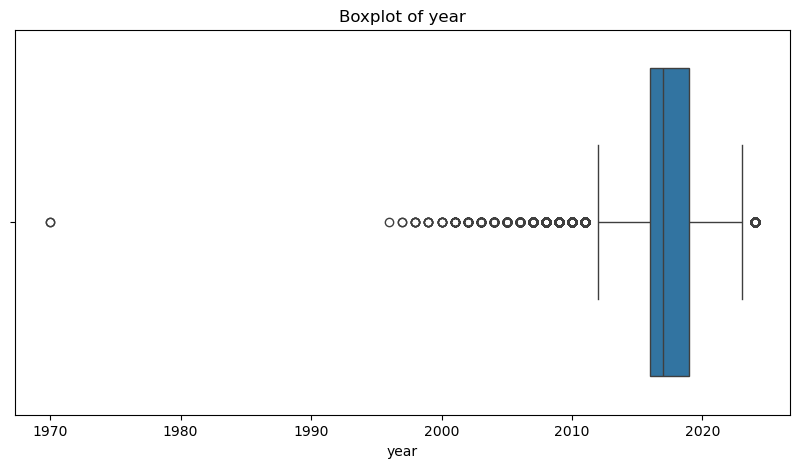

In [58]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['year'].dropna().astype(int), bins=30, kde=True) 
plt.title('Histogram of year')
plt.xlabel('year')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['year'].dropna().astype(int))
plt.title('Boxplot of year')
plt.xlabel('year')
plt.show()

In [59]:
year_counts = df_train["year"].value_counts(bins=[1970, 1980, 1990, 2000, 2010, 2020, 2025])
year_percent = (year_counts / len(df_train)) * 100
year_percent

(2010.0, 2020.0]      96.127572
(2000.0, 2010.0]       1.411028
(2020.0, 2025.0]       0.471220
(1990.0, 2000.0]       0.025009
(1969.999, 1980.0]     0.002633
(1980.0, 1990.0]       0.000000
Name: count, dtype: float64

- Cars between 1970 and 2000 represent ~0.03% of total sample, it does not seem to make sense to keep them, their presence would only introduce noise and reduce the model’s ability to generalize to current car prices

In [60]:
df_train = df_train = df_train[df_train["year"] > 2000]
df_train["year"].value_counts()

year
2019    20271
2017    16146
2016    11502
2018    10304
2015     5733
2020     3174
2014     2930
2013     1923
2011      570
2012      478
2010      333
2023      230
2009      228
2008      158
2024      128
2007      123
2005       64
2006       62
2004       35
2003       29
2002       25
2001       15
Name: count, dtype: Int64

#### Year Observations
- Initial NaNs: 1,491.
- Years with decimals were rounded to the nearest integer.
- dtype converted to int.
- Data is mostly recent (2010–2020).
- Cars between 1970 and 2000 got removed

## 2.5. Mileage

Cheking Nan Values.

In [61]:
df_train['mileage'].isna().sum()

np.int64(1439)

Checking inconsistencies.

In [62]:
df_train['mileage'].head(15)

0      28421.000000
1       4589.000000
2       3624.000000
3       9102.000000
4       1000.000000
5     101153.348285
6      21396.000000
7     116750.000000
8      30339.000000
9      10700.000000
10     21123.000000
11      1000.000000
12     26360.000000
13     14378.000000
14      9500.000000
Name: mileage, dtype: float64

It doesn’t make sense to have so many decimal places when we’re talking about a vehicle’s mileage. The most appropriate approach is to convert these numbers to the nearest integers by changing the dtype to int64.

In [63]:
# Convert mileage to nearest integer.
df_train['mileage'] = df_train['mileage'].round()

C:\Users\migue\AppData\Local\Temp\ipykernel_21628\2590400244.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = df_train['mileage'].round()


In [64]:
# And change dtype to int64.
df_train['mileage'] = df_train['mileage'].astype('Int64')

C:\Users\migue\AppData\Local\Temp\ipykernel_21628\1093337665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['mileage'] = df_train['mileage'].astype('Int64')


In [65]:
df_train['mileage'].head(15)

0      28421
1       4589
2       3624
3       9102
4       1000
5     101153
6      21396
7     116750
8      30339
9      10700
10     21123
11      1000
12     26360
13     14378
14      9500
Name: mileage, dtype: Int64

From the describe() output in Chapter 1, we can see that the mileage contains some negative values. Let's analyze them.

In [66]:
df_train[df_train['mileage'] < 0]

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
268,70615,vw,tiguan,2020,25000,Manual,-48191,Petrol,145.0,38.2,1.5,89.0,3.0,0.0
284,43529,mercedes,c class,2019,25780,Semi-Auto,-50755,Diesel,NaN,NaN,2.0,72.0,3.0,0.0
325,71090,vw,golf,2018,14995,Manual,-48191,Diesel,150.0,57.7,1.6,83.0,2.0,0.0
843,7845,bmw,3 series,2019,23498,Semi-Auto,-58541,Diesel,145.0,54.3,2.0,38.0,NaN,0.0
853,24999,ford,fiesta,2017,8895,Manual,-42650,Petrol,125.0,54.3,1.2,45.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74961,56373,opel,None,2018,8514,Manual,-42708,Petrol,150.0,55.4,1.4,49.0,1.0,NaN
75015,45765,mercedes,gle class,2020,54995,Automatic,-50755,Diesel,150.0,32.8,3.0,69.0,4.0,0.0
75423,38413,mercedes,slk,2015,17900,Automati,-50755,Diesel,150.0,56.5,2.1,40.0,3.0,0.0
75859,55820,toyota,aygo,2019,8491,Manual,-39766,Petrol,145.0,56.5,1.0,56.0,0.0,0.0


We have 361 negative mileage values. Although the absolute values seem plausible, since we cannot confirm their correctness, it's safer to mark them as missing (NaN).

In [67]:
# Replacing the negative mileage values with NaNs.
#df_train.loc[df_train['mileage'] < 0] 
df_train.loc[df_train['mileage'] < 0, 'mileage'] = np.nan 

In [68]:
# Checking final number of Nan values in mileage column.
df_train['mileage'].isna().sum()

np.int64(1800)

Visualizing the variable mileage on a histogram and boxplot.

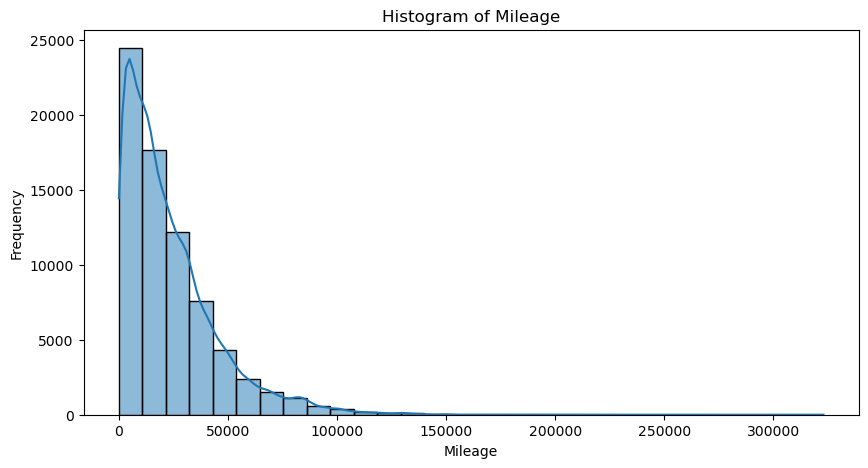

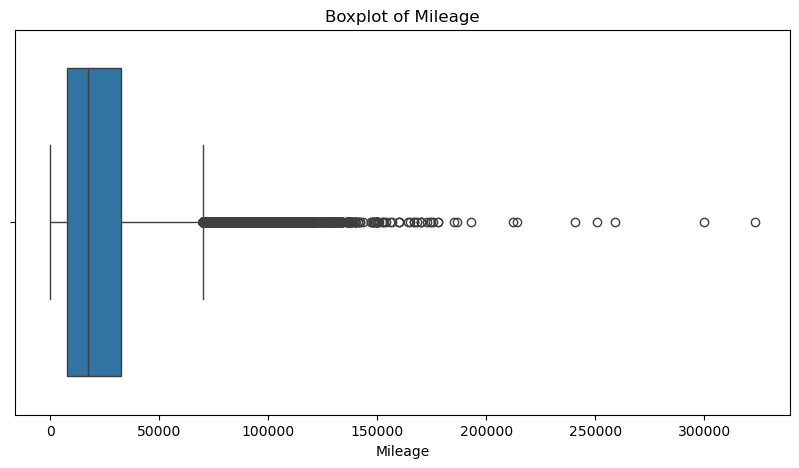

In [69]:
# Histogram
plt.figure(figsize=(10,5))
sns.histplot(df_train['mileage'].dropna().astype(int), bins=30, kde=True) 
plt.title('Histogram of Mileage')
plt.xlabel('Mileage')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['mileage'].dropna().astype(int))
plt.title('Boxplot of Mileage')
plt.xlabel('Mileage')
plt.show()

In [70]:
mileage_bins = [0, 20000, 40000, 60000, 80000, 100000, 150000, 200000, 300000, df_train['mileage'].max()]

mileage_counts = df_train['mileage'].value_counts(bins=mileage_bins, sort=False)
mileage_percent = (mileage_counts / len(df_train)) * 100

mileage_percent

(-0.001, 20000.0]       53.826836
(20000.0, 40000.0]      26.859698
(40000.0, 60000.0]      10.400075
(60000.0, 80000.0]       3.738870
(80000.0, 100000.0]      1.897638
(100000.0, 150000.0]     0.813849
(150000.0, 200000.0]     0.036261
(200000.0, 300000.0]     0.008058
(300000.0, 323000.0]     0.001343
Name: count, dtype: float64

- Similar to the year variable, there are extreme outliers that would not help the model to generalize, so cars above 150k will get removed since they account for ~0.05% of the sample. Cars between 100 and 150k will be maintened by now, but in the future should be revisited.

In [71]:
df_train = df_train[df_train["mileage"] < 150000]
df_train['mileage'].value_counts(bins=mileage_bins, sort=False)

(-0.001, 20000.0]       40080
(20000.0, 40000.0]      20000
(40000.0, 60000.0]       7744
(60000.0, 80000.0]       2784
(80000.0, 100000.0]      1413
(100000.0, 150000.0]      599
(150000.0, 200000.0]        0
(200000.0, 300000.0]        0
(300000.0, 323000.0]        0
Name: count, dtype: int64

#### Mileage Observations
- Initial NaNs: 1439.
- Floats rounded to integers; dtype converted to int.
- 361 negative mileage values detected - replaced with NaN.
- Final NaNs: 1800.
- Most cars have low mileage
- Very few cars exceed 50,000 miles.
- Outliers appear around ~70,000 miles.
- Cars with more than 150000 mileage got removed.

## 2.6. Tax 

Cheking Nan Values.

In [72]:
df_train['tax'].isna().sum()

np.int64(7569)

Cheking Inconsistencies.

In [73]:
df_train['tax'].unique()

array([         nan, 145.        ,  30.        ,  20.        ,
       150.        , 160.        ,   0.        , 125.        ,
       200.        , 250.        , -56.19320154, 300.        ,
       205.        , 260.        , 325.        , 135.        ,
       -45.78061049, 265.        , 305.        , 303.14889146,
       235.        , 299.47350391, 240.        , 165.        ,
       140.        , 540.        , 155.        , 220.        ,
       120.        , 330.        , 290.48678508, 326.02823317,
       -20.24107949, -18.33074314, 327.91577835, 115.        ,
       185.        , 316.48718937, 570.        , -49.15354066,
       316.29630636, -60.6840948 , 555.        , 277.38425448,
       -91.12163048,  10.        , 315.        , 190.        ,
       -31.91494466, 230.        , -43.24208237, 294.84340933,
       195.        , 580.        , 290.        , 270.        ,
       130.        , 565.        , 210.        , 280.        ,
       520.        , 110.        , 535.        ])

We check for negative values in the 'tax' column, which are clearly errors. Additionally, decimal values do not make sense here, so we can round them to integers.

In [74]:
# Round the 'tax' values to the nearest integer.
df_train['tax'] = df_train['tax'].round()

In [75]:
# Convert the dtype to nullable integer (Int64) for consistency.
df_train['tax'] = df_train['tax'].astype('Int64')

In [76]:
df_train['tax'].unique()

<IntegerArray>
[<NA>,  145,   30,   20,  150,  160,    0,  125,  200,  250,  -56,  300,  205,
  260,  325,  135,  -46,  265,  305,  303,  235,  299,  240,  165,  140,  540,
  155,  220,  120,  330,  290,  326,  -20,  -18,  328,  115,  185,  316,  570,
  -49,  -61,  555,  277,  -91,   10,  315,  190,  -32,  230,  -43,  295,  195,
  580,  270,  130,  565,  210,  280,  520,  110,  535]
Length: 61, dtype: Int64

In [77]:
(df_train['tax'] < 0).sum()

np.int64(359)

There are 369 negative values in the tax column. We cannot confirm whether their absolute values are correct, we will replace them with NaN.

In [78]:
# Replace negative tax values with NaN.
df_train.loc[df_train['tax'] < 0]
df_train.loc[df_train['tax'] < 0, 'tax'] = pd.NA

In [79]:
# Final Number of Nan Values.
df_train['tax'].isna().sum()

np.int64(7928)

In [80]:
# ~11% of the variable is nan
(df_train['tax'].isna().sum() / len(df_train))* 100

np.float64(10.91710272652162)

Visualizing the variable tax on a histogram and boxplot.

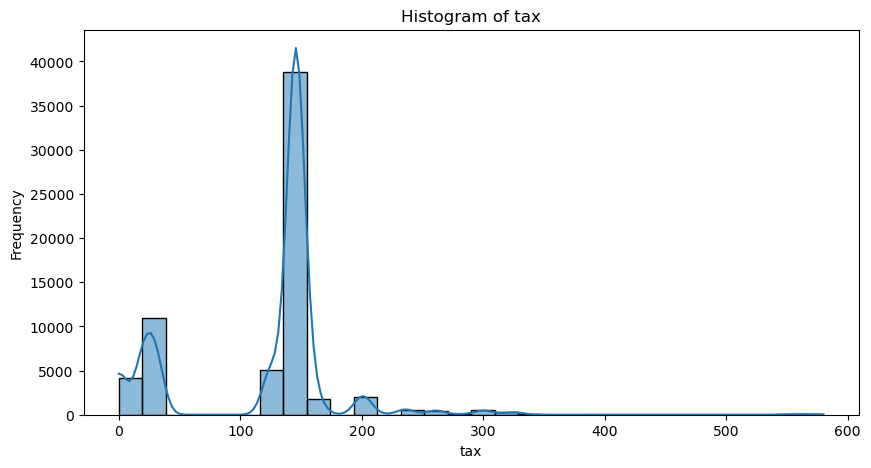

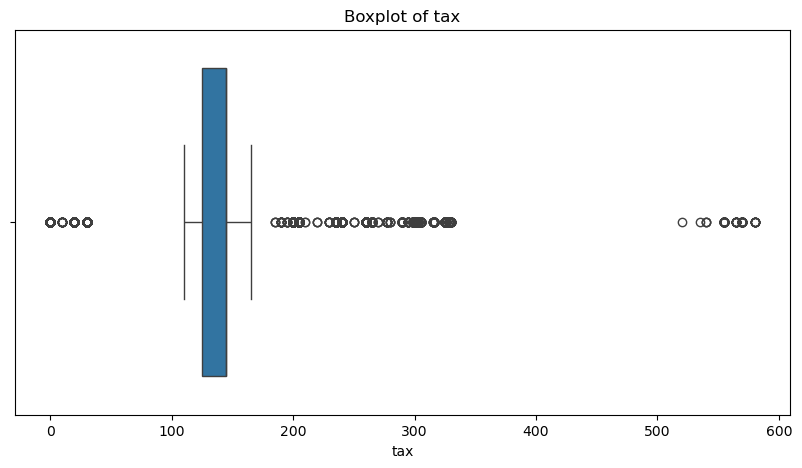

In [81]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['tax'].dropna().astype(int), bins=30, kde=True) 
plt.title('Histogram of tax')
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['tax'].dropna().astype(int))
plt.title('Boxplot of tax')
plt.xlabel('tax')
plt.show()

In [82]:
# lets see the cars with higher tax, since we suspect these are premium cars
df_train[df_train["tax"] > 500].head(15)

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
795,2522,audi,q7,2009,8995,Automatic,136000,NaN,540,31.0,3.000000,66.0,1.0,0.0
3046,24745,ford,mustang,2017,28000,Semi-Auto,23179,Petrol,570,23.5,5.000000,63.0,1.0,0.0
3812,12545,bmw,x5,2011,15980,Automatic,46000,Petrol,570,22.6,4.400000,80.0,3.0,0.0
3954,42387,mercedes,m class,2011,7995,Automatic,131000,Diesel,555,31.0,3.723712,65.0,3.0,0.0
4784,13600,bmw,6 series,2006,4999,Automatic,126054,Petrol,555,29.7,3.000000,80.0,2.0,0.0
6907,6884,audi,tt,2007,7850,Manual,50750,Petrol,555,27.4,3.200000,99.0,3.0,0.0
7586,6752,audi,r8,2014,51990,Semi-Auto,19800,Petrol,570,22.8,4.200000,70.0,3.0,0.0
7604,30357,ford,mustang,2016,26475,Manual,12000,Petrol,570,20.9,5.000000,98.0,3.0,0.0
8523,41531,mercedes,sl class,2016,49948,Automatic,6200,Petrol,555,28.0,5.500000,79.0,4.0,NaN
8564,21006,ford,kuga,2012,8150,Automatic,69382,Petrol,555,27.4,2.500000,52.0,1.0,0.0


#### Tax Observations

- Initially 7739 NaNs; after cleaning, 8108 NaNs.
- Float values converted to int.
- Negative values replaced with NaN.
- Many high outliers, related with premium cars.
- This variable should be assessed later to determine its real impact on the model

## 2.7. FuelType

Ckecking Nan values.

In [83]:
# Sum of all Nan values in fuelType variable.
df_train['fuelType'].isna().sum()

np.int64(1435)

Cheking Inconsistencies.

In [84]:
# Get unique values from the 'fuelType' column.
df_train['fuelType'].unique()

array(['Petrol', 'Diesel', 'etrol', 'Hybrid', 'diesel', 'iesel', nan,
       'petrol', 'PETROL', 'Diese', 'Petro', 'DIESEL', 'petro', 'HYBRID',
       'ybri', 'Other', 'DIESE', 'Hybri', 'ETROL', 'ybrid', 'PETRO',
       'hybrid', 'IESEL', 'Electric', 'ther', 'iese', 'etro', 'ETRO',
       'diese', 'Othe', 'YBRID', 'HYBRI', 'OTHER', 'other', 'IESE'],
      dtype=object)

In [85]:
# Get the unique values sorted alphabetically.
sorted(df_train['fuelType'].dropna().unique())

['DIESE',
 'DIESEL',
 'Diese',
 'Diesel',
 'ETRO',
 'ETROL',
 'Electric',
 'HYBRI',
 'HYBRID',
 'Hybri',
 'Hybrid',
 'IESE',
 'IESEL',
 'OTHER',
 'Othe',
 'Other',
 'PETRO',
 'PETROL',
 'Petro',
 'Petrol',
 'YBRID',
 'diese',
 'diesel',
 'etro',
 'etrol',
 'hybrid',
 'iese',
 'iesel',
 'other',
 'petro',
 'petrol',
 'ther',
 'ybri',
 'ybrid']

Similar to the variable ‘model’, we’ll convert all strings to lowercase to make the analysis easier.

In [86]:
# Convert all string values in the 'fuelType' column to uppercase.
# Non-string values (e.g., NaN) will remain unchanged.
df_train['fuelType'] = df_train['fuelType'].str.lower()

In [87]:
def fuzzy_to_domain(value, domain, conf_min=60):

    match = process.extractOne(value, domain, scorer=fuzz.WRatio)
    if match is None:
        return None
    label, score = match[0], match[1]

    return label

In [88]:
fuel_values = ["diesel", "petrol", "hybrid","electric", "other"]
df_train["fuelType"] = df_train["fuelType"].apply(lambda x: fuzzy_to_domain(x, domain=fuel_values))

In [89]:
# Replace all 'other' values in the 'fueltype' column with NaN
df_train['fuelType'] = df_train['fuelType'].replace('other', np.nan)

In [90]:
# Get the unique values sorted alphabetically and corrected.
sorted(df_train['fuelType'].dropna().unique())

['diesel', 'electric', 'hybrid', 'petrol']

Visualizing the fuel type on a countplot.

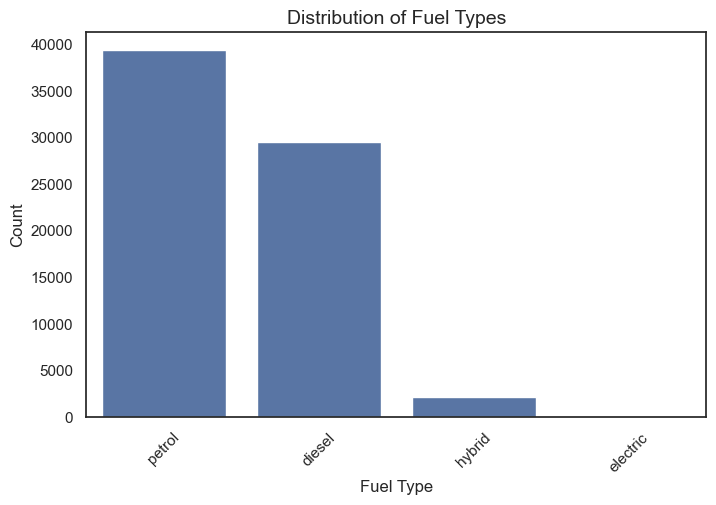

In [91]:
sns.set(style="white")

# Create a countplot to visualize the distribution of 'fuelType'.
plt.figure(figsize=(8, 5))  
sns.countplot(x='fuelType', data=df_train, order=df_train['fuelType'].value_counts().index)

# Add title and labels
plt.title('Distribution of Fuel Types', fontsize=14)
plt.xlabel('Fuel Type', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels.
plt.xticks(rotation=45)
plt.show()

In [92]:
df_train["fuelType"].value_counts()

fuelType
petrol      39355
diesel      29526
hybrid       2146
electric        3
Name: count, dtype: int64

#### FuelType Observations
- 1435 missing values were found.
- 5 categories found when metadata only reported 4
- Typing errors were identified and corrected.
- Petrol is the most common fuel type, followed by diesel.
- Only a very small portion of the dataset is electric, altough they can´t be removed because if it appears a car within this categorie the model will not know how handle that situation, should be looked into later stages.

## 2.8. Mpg

Ckecking Nan values.

In [93]:
# Sum of all Nan values in mpg variable.
df_train['mpg'].isna().sum()

np.int64(7584)

Cheking Inconsistencies.

In [94]:
# Get unique values from the 'mpg' column.
df_train['mpg'].unique()

array([ 11.41726775,  47.9       ,  40.9       ,  65.7       ,
        42.8       ,  60.1       ,  68.9       ,  62.8       ,
        67.3       ,  54.3       ,  57.7       ,          nan,
        56.5       ,  72.4       ,  47.1       ,  44.1       ,
        32.5       ,  48.7       ,  74.3       ,  43.5       ,
        51.4       ,  50.4       ,  67.        ,  28.5       ,
        64.2       ,  61.4       ,  41.5       ,  52.3       ,
        53.3       ,  44.8       ,  35.8       ,  80.7       ,
        37.2       ,  49.6       ,  42.2       ,  45.6       ,
        34.        ,  74.4       ,  29.1       ,  40.3       ,
        58.9       ,  39.8       ,  55.4       ,  40.4       ,
        78.4       ,  83.1       ,  46.3       ,  34.5       ,
        35.3       ,  39.2       ,  32.8       ,  34.9       ,
        61.7       ,  30.        ,  70.6       , 156.9       ,
        36.2       ,  58.        ,  69.        ,  37.7       ,
        57.6       ,  66.        , 151.04180955,   9.42

- No zero values, which would be impossible.
- Most values like 11.4, 47.9, 40.9, 65.7, make sense.
- Negative values (-43.42) are clearly errors.

For this variable, it makes sense to have decimal values, but we don’t need so many. We can round all values to just one decimal place.

In [95]:
# Round all values in the 'mpg' column to one decimal place
df_train['mpg'] = df_train['mpg'].round(1)

Checking negative values.

In [96]:
(df_train['mpg'] < 0).sum()

np.int64(33)

In [97]:
df_train[df_train['mpg'] < 0]

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
758,13396,bmw,x1,2019,25480,Semi-Auto,5163,petrol,145,-43.4,2.0,86.0,1.0,0.0
2545,14934,bmw,3 series,2019,29500,Automatic,3185,petrol,145,-43.4,2.0,97.0,3.0,0.0
5156,14127,bmw,2 series,2020,32450,Semi-Auto,1118,diesel,145,-43.4,2.0,37.0,1.0,0.0
6306,14420,bmw,2 series,2015,17799,Automatic,38902,petrol,260,-43.4,3.0,33.0,4.0,0.0
7454,12400,bmw,x5,2016,26995,Automatic,46126,diesel,200,-43.4,3.0,77.0,2.0,0.0
7577,14603,bmw,2 series,2015,17541,Semi-Auto,26035,petrol,165,-43.4,2.0,75.0,3.0,0.0
9800,11181,bmw,1 series,2019,19298,Semi-Auto,10040,diesel,145,-43.4,2.0,70.0,3.0,0.0
10107,7781,bmw,3 series,2017,14800,Manual,29968,diesel,30,-43.4,2.0,52.0,1.0,0.0
10381,9202,bmw,x1,2016,17000,Automatic,46968,diesel,125,-43.4,2.0,82.0,0.0,0.0
11235,10214,bmw,3 series,2014,14500,Automatic,45140,diesel,125,-43.4,3.0,77.0,2.0,0.0


All these negative values are the same (-43.4) and belong to BMW cars with different engine sizes. This likely indicates a data entry error, and the correct values could potentially be imputed based on similar BMW models

In [98]:
# Set every mpg value less than 0 to NaN.
df_train.loc[df_train['mpg'] < 0, 'mpg'] = np.nan

In [99]:
# New number of Nan values in mpg variable.
df_train['mpg'].isna().sum()

np.int64(7617)

Visualizing the variable mpg on a histogram and boxplot.

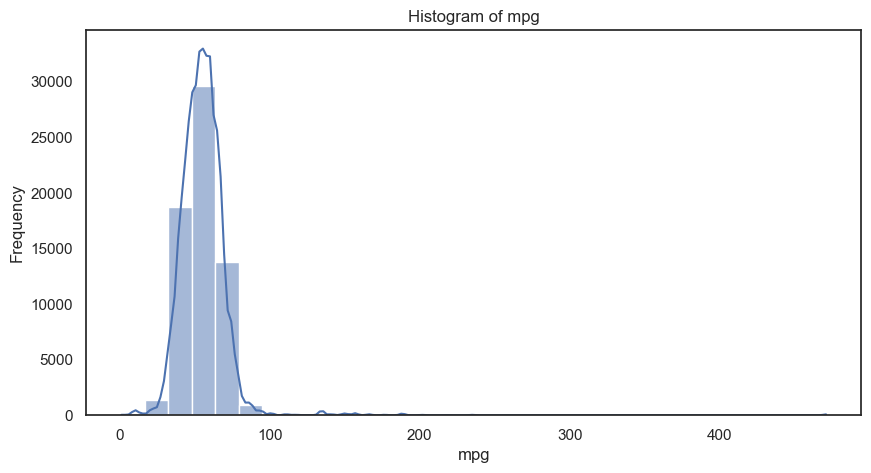

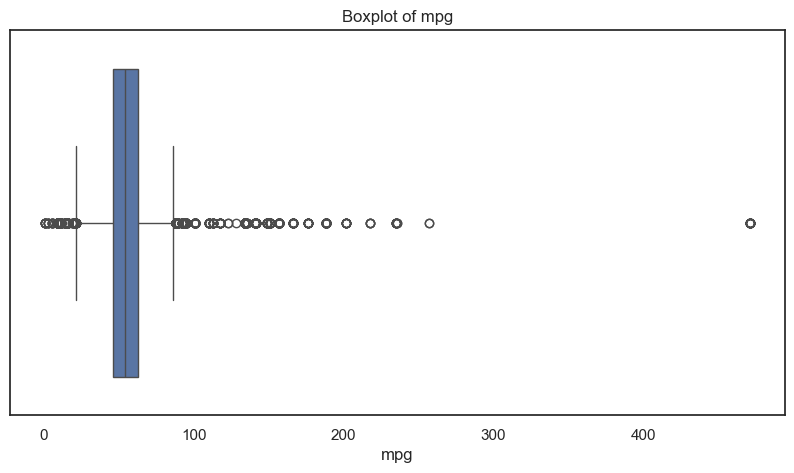

In [100]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['mpg'], bins=30, kde=True) 
plt.title('Histogram of mpg')
plt.xlabel('mpg')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['mpg'])
plt.title('Boxplot of mpg')
plt.xlabel('mpg')
plt.show()

In [101]:
# Inspect highest outlier, is this an error ?
df_train.loc[df_train["mpg"].idxmax()]

carID                 13075
brand                   bmw
model                    i3
year                   2015
price                 15498
transmission      Automatic
mileage               33931
fuelType             hybrid
tax                       0
mpg                   470.8
engineSize              0.0
paintQuality%          31.0
previousOwners          4.0
hasDamage               0.0
Name: 4101, dtype: object

In [102]:
df_train[(df_train["brand"] == "bmw") & (df_train["model"] == "i3")]

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4101,13075,bmw,i3,2015,15498,Automatic,33931,hybrid,0,470.8,0.000000,31.0,4.00000,0.0
5278,12640,bmw,i3,2017,19500,Automatic,23956,NaN,135,470.8,0.600000,53.0,1.00000,0.0
6978,12786,bmw,i3,2015,17400,Automatic,29465,electric,0,470.8,3.822758,67.0,2.00000,0.0
18261,8993,bmw,i3,2016,18999,Automatic,9990,None,0,470.8,0.000000,44.0,0.00000,0.0
18710,12853,bmw,i3,2017,21898,Automatic,10839,hybrid,0,470.8,0.000000,31.0,4.00000,0.0
21445,12090,bmw,i3,2016,19490,Automatic,8421,hybrid,0,470.8,0.000000,31.0,4.00000,0.0
24883,10653,bmw,i3,2017,19895,Automatic,29851,hybrid,0,NaN,0.000000,40.0,0.00000,0.0
24975,13378,bmw,i3,2015,17481,Automatic,9886,hybrid,0,470.8,0.000000,44.0,0.00000,0.0
29581,12269,bmw,i3,2017,19980,Automatic,26965,hybrid,140,470.8,0.000000,81.0,3.00000,0.0
33829,11532,bmw,i3,2016,16500,Automatic,35446,hybrid,0,470.8,0.000000,59.0,3.00000,0.0


- This inspection turns out to be very usefull:
      1) this value of mpg is not an error it´s a caractheristic of the model;
      2) this car is the proof that transmission/fuelType NaN values can be in some cases imputed by mode

#### Mpg Observations

- Initial missing values: 7584 NaN
- Found very high outliers: 470.8
- Found negative vales: -43.42. All from the same brand - BMW
- Updated missing values: 7617 NaN

## 2.9. EngineSize

Ckecking Nan values.

In [103]:
# Sum of all Nan values in engineSizeS variable.
df_train['engineSize'].isna().sum()

np.int64(1459)

Cheking Inconsistencies.

In [104]:
# Get unique values from the 'engineSize' column.
df_train['engineSize'].unique()

array([ 2.        ,  1.5       ,  1.        ,  1.4       ,  1.6       ,
               nan,  1.2       ,  3.        ,  1.8       ,  2.1       ,
        1.3       ,  0.7395339 ,  0.        ,  2.3       ,  1.1       ,
        4.        ,  1.7       ,  2.98579344,  2.2       ,  2.5       ,
        2.61964142,  2.78177621,  2.63120047,  3.72371217,  0.15452932,
        3.2       ,  2.9       ,  2.8       ,  0.31340658,  2.06411863,
        3.73923548,  2.4       ,  0.18642488, -0.1034928 ,  2.6631132 ,
        5.2       ,  0.19146242,  5.        ,  0.30707394,  0.37112737,
        4.4       ,  6.2       ,  3.82275785,  0.6       ,  1.9       ,
        6.6       ,  5.5       ,  4.2       ,  3.5       ,  4.7       ,
        0.16286595,  2.7       ,  5.4       ,  4.5       ,  4.1       ])

These very small engine sizes (0.154 L, 0.186 L, 0.191 L, 0.307 L) are unrealistic. They are likely errors caused by wrong units, misplaced decimals, or data entry mistakes.

It also doesn’t make sense to have some values with so many decimal places. Let’s round them all to just one decimal place.

In [105]:
# Rounding all values to just one decimal place.
df_train['engineSize'] = df_train['engineSize'].round(1)

In [106]:
sorted(df_train['engineSize'].dropna().unique())

[np.float64(-0.1),
 np.float64(0.0),
 np.float64(0.2),
 np.float64(0.3),
 np.float64(0.4),
 np.float64(0.6),
 np.float64(0.7),
 np.float64(1.0),
 np.float64(1.1),
 np.float64(1.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(1.5),
 np.float64(1.6),
 np.float64(1.7),
 np.float64(1.8),
 np.float64(1.9),
 np.float64(2.0),
 np.float64(2.1),
 np.float64(2.2),
 np.float64(2.3),
 np.float64(2.4),
 np.float64(2.5),
 np.float64(2.6),
 np.float64(2.7),
 np.float64(2.8),
 np.float64(2.9),
 np.float64(3.0),
 np.float64(3.2),
 np.float64(3.5),
 np.float64(3.7),
 np.float64(3.8),
 np.float64(4.0),
 np.float64(4.1),
 np.float64(4.2),
 np.float64(4.4),
 np.float64(4.5),
 np.float64(4.7),
 np.float64(5.0),
 np.float64(5.2),
 np.float64(5.4),
 np.float64(5.5),
 np.float64(6.2),
 np.float64(6.6)]

Anything smaller than 1.0 L is unrealistic and negative or zero values are also errors. Therefore, we will replace these values with NaN.

In [107]:
df_train.loc[df_train['engineSize'] < 1.0] = np.nan

In [108]:
# Inspecting high outliers, are these wrong values ?
df_train.loc[(df_train['engineSize'] > 5.0)]

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
2824,5953.0,audi,r8,2019,137500.0,Semi-Auto,10,petrol,150,21.4,5.2,70.0,1.0,0.0
4049,38980.0,mercedes,c class,2013,23000.0,Semi-Auto,43442,petrol,<NA>,NaN,6.2,76.0,0.0,0.0
5047,46372.0,mercedes,c class,2013,22995.0,Semi-Auto,49964,petrol,<NA>,23.0,6.2,78.0,3.0,0.0
5630,9197.0,bmw,7 series,2017,57000.0,Automatic,11297,petrol,145,22.1,6.6,68.0,1.0,0.0
6030,42286.0,mercedes,c class,2014,26998.0,Semi-Auto,24175,petrol,<NA>,NaN,6.2,93.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70337,39752.0,mercedes,c class,2014,21495.0,Automatic,56444,petrol,<NA>,NaN,6.2,52.0,3.0,0.0
70579,39725.0,mercedes,gle class,2017,52999.0,Semi-Auto,23000,petrol,145,23.9,5.5,34.0,1.0,0.0
70612,46040.0,mercedes,gls class,2017,53000.0,utomatic,45239,petrol,150,23.0,5.5,89.0,4.0,0.0
70754,34980.0,mercedes,s class,2014,41980.0,utomatic,26000,petrol,555,28.0,5.5,92.0,1.0,0.0


- According to sources like https://www.carwow.co.uk/guides/choosing/what-engine-size-do-i-need-0521? , cars above the 3.0 are high end models but realistic.
- Above 6.0 are a real stretch, but in cases like the mercedes c class amg it corresponds exactly to 6.2 https://en.wikipedia.org/wiki/Mercedes-Benz_M156_engine, which corresponds to the cars with this specification.

In [109]:
df_train.loc[(df_train['engineSize'] > 6.0)]

,carID,brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
4049,38980.0,mercedes,c class,2013,23000.0,Semi-Auto,43442,petrol,<NA>,NaN,6.2,76.0,0.0,0.0
5047,46372.0,mercedes,c class,2013,22995.0,Semi-Auto,49964,petrol,<NA>,23.0,6.2,78.0,3.0,0.0
5630,9197.0,bmw,7 series,2017,57000.0,Automatic,11297,petrol,145,22.1,6.6,68.0,1.0,0.0
6030,42286.0,mercedes,c class,2014,26998.0,Semi-Auto,24175,petrol,<NA>,NaN,6.2,93.0,2.0,0.0
9759,39900.0,mercedes,c class,2014,28990.0,Semi-Auto,19562,petrol,<NA>,NaN,6.2,83.0,0.0,0.0
13474,39852.0,mercedes,s class,2010,26990.0,Automatic,38000,petrol,570,19.5,6.2,76.0,4.0,0.0
17208,36196.0,mercedes,c class,2014,25885.0,Semi-Auto,86706,petrol,<NA>,NaN,6.2,31.0,0.0,0.0
20916,44937.0,mercedes,c class,2013,21999.0,Automatic,41866,petrol,570,23.5,6.2,80.0,0.0,0.0
24327,46536.0,mercedes,c class,2013,23990.0,Automati,44000,petrol,<NA>,NaN,6.2,88.0,2.0,0.0
34252,44794.0,mercedes,c class,2014,25885.0,Semi-Auto,37000,petrol,570,23.5,6.2,92.0,2.0,0.0


In [110]:
# Cheking final number of Nan Values.
df_train['engineSize'].isna().sum()

np.int64(2012)

Visualizing the variable engineSize on a histogram and boxplot.

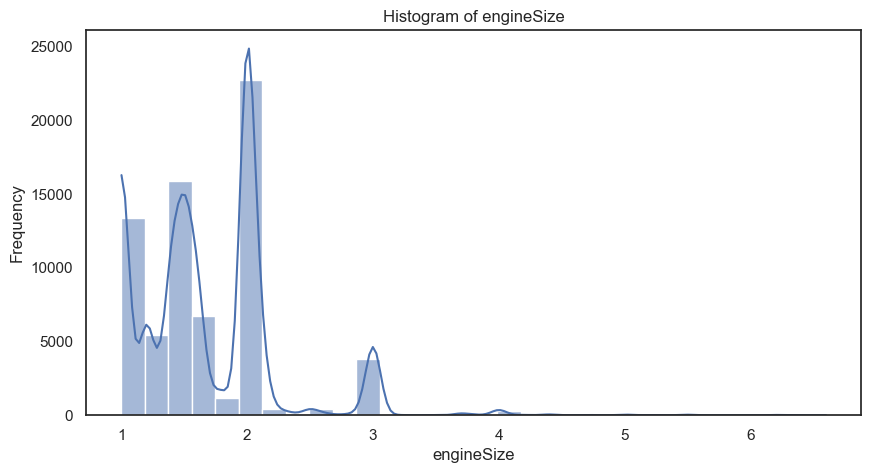

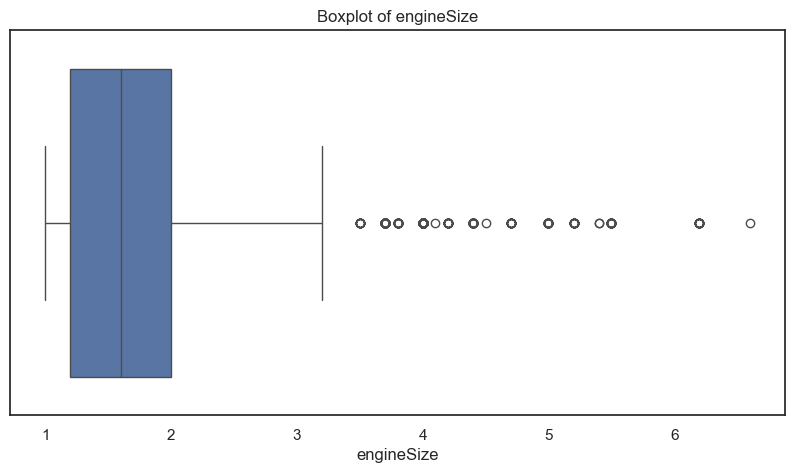

In [111]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['engineSize'], bins=30, kde=True) 
plt.title('Histogram of engineSize')
plt.xlabel('engineSize')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['engineSize'])
plt.title('Boxplot of engineSize')
plt.xlabel('engineSize')
plt.show()

#### EngineSize Observations 

- Initially, 1,516 NaN values were present in the engineSize column.
- Unrealistic values (below 1.0 L) were replaced with NaN.
- The final number of NaN values is 2,161.
- The most common engine size is 2.0 L.
- Values above 3.5 L are considered outliers, representing rarer car models.

## 2.10. PreviousOwners

Ckecking Nan values.

In [112]:
# Sum of all Nan values in previousOwners variable.
df_train['previousOwners'].isna().sum()

np.int64(2022)

Cheking Inconsistencies.

In [113]:
# Get unique values from the 'previousOwners' column.
df_train['previousOwners'].unique()

array([ 4.        ,  1.        , -2.34030622,  3.        ,  0.        ,
        2.        ,         nan, -2.34565   ,  6.25837066, -2.33512284,
        6.22789796,  6.23017958, -2.33936045,  6.21772443,  6.24583495,
        6.25823052, -2.29943868, -2.34010209, -2.31225953,  6.2482512 ,
       -2.31733109,  6.23308217,  6.24177863, -2.33744529])

- It doesn’t make sense for the number of previous owners to be a float.
- We need to round values to the nearest integer and change the dtype to Int64.
- Negative numbers of previous owners also don’t make sense.
- 0 previous ownres can make sense since the car can be totally new.

In [114]:
# Round to nearest integer.
df_train['previousOwners'] = df_train['previousOwners'].round(0)

In [115]:
df_train['previousOwners'].unique()

array([ 4.,  1., -2.,  3.,  0.,  2., nan,  6.])

In [116]:
# Checking the negatve number of previous owners.
(df_train['previousOwners'] < 0).sum()

np.int64(352)

In [117]:
# Replace negative values with NaN.
df_train['previousOwners'] = df_train['previousOwners'].apply(lambda x: np.nan if x < 0 else x)

In [118]:
df_train['previousOwners'].unique()

array([ 4.,  1., nan,  3.,  0.,  2.,  6.])

Fixing dtype from float to Int64

In [119]:
# Convert the column to integer type (Int64 allows NaN values).
df_train['previousOwners'] = df_train['previousOwners'].astype('Int64')

In [120]:
# Cheking final number of Nan Values.
df_train['previousOwners'].isna().sum()

np.int64(2374)

Visualizing the variable previousOwners on a histogram and boxplot.

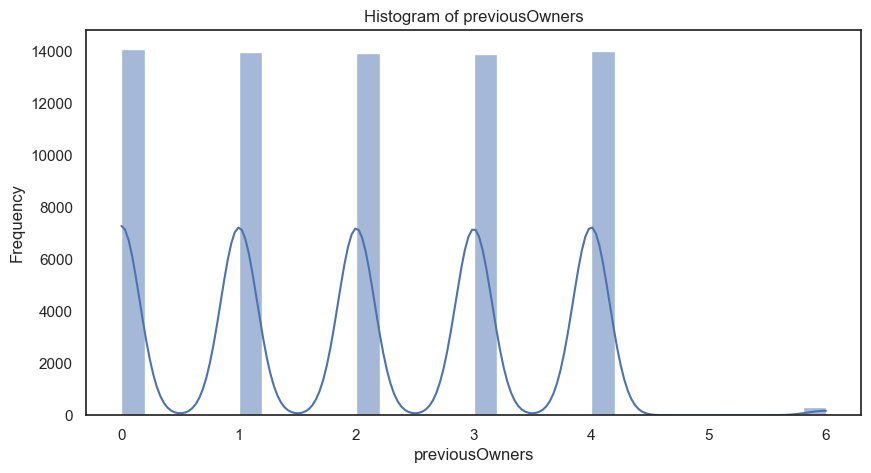

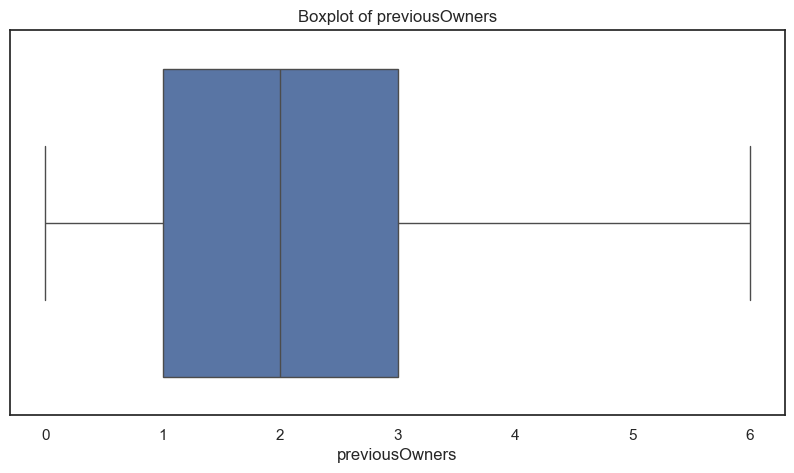

In [121]:
# Histogram.
plt.figure(figsize=(10,5))
sns.histplot(df_train['previousOwners'], bins=30, kde=True) 
plt.title('Histogram of previousOwners')
plt.xlabel('previousOwners')
plt.ylabel('Frequency')
plt.show()

# Boxplot.
plt.figure(figsize=(10,5))
sns.boxplot(x=df_train['previousOwners'])
plt.title('Boxplot of previousOwners')
plt.xlabel('previousOwners')
plt.show()

Visualizing the variable engineSize in a countplot.

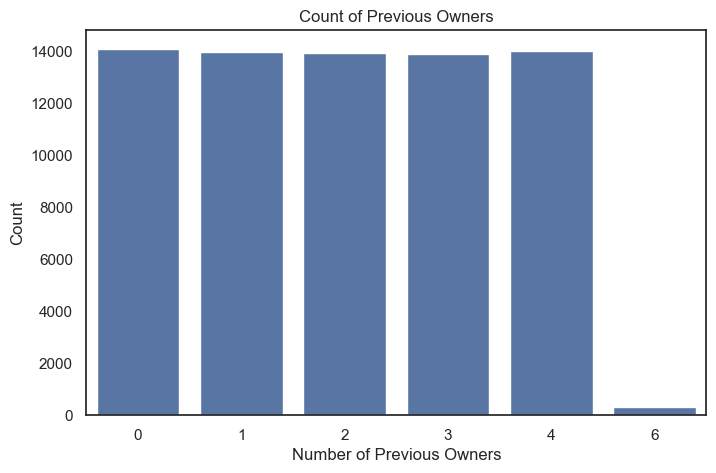

In [122]:
# Plot countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='previousOwners', data=df_train)
plt.title('Count of Previous Owners')
plt.xlabel('Number of Previous Owners')
plt.ylabel('Count')
plt.show()

#### PreviousOwners Observations

- Initially, previousOwners had 1,550 NaN values.
- Negative values were found, which are impossible, so they were replaced with NaN.
- The new total of NaN values is 1,921.
- The data type was changed from float to Int64.
- No outliers were detected; all values appear realistic.
- Most cars have 0, 1, 2, 3, or 4 previous owners, well distributed.
- Very few cars have 6 previous owners.

## 2.11. HasDamage

In [123]:
# Sum of all Nan values in hasDamage variable.
df_train['hasDamage'].isna().sum()

np.int64(2020)

1548 cars don't have damage or this number also represent missing data?

In [124]:
df_train['hasDamage'].value_counts(dropna=False, normalize=True) * 100

hasDamage
0.0    97.218397
NaN     2.781603
Name: proportion, dtype: float64

In [125]:
df_train = df_train.drop(columns=['hasDamage'])

#### Has Damage Observations
- No car is marked with damage
- Since 98% of cars have the same value for this variable, it has no predicting power so should be removed

## 2.12. Price

Ckecking Nan values.

In [126]:
# Sum of all Nan values of price variable.
df_train['price'].isna().sum()

np.int64(553)

Cheking Inconsistencies.

In [127]:
df_train['price'].head(30)

0     22290.0
1     13790.0
2     24990.0
3     12500.0
4     22995.0
5      8199.0
6     16089.0
7      7500.0
8     15999.0
9     15300.0
10    11998.0
11    24109.0
12    17799.0
13    13295.0
14    13990.0
15    19491.0
16     6990.0
17    19995.0
18    18997.0
19    28995.0
20     7500.0
21    31299.0
22     8995.0
23    45995.0
24    12299.0
25    26176.0
27    57895.0
28     6750.0
29    17990.0
30    15490.0
Name: price, dtype: float64

Checking the statitics.

In [128]:
df_train['price'].describe()

count     72067.000000
mean      16899.696505
std        9755.979793
min         450.000000
25%       10240.000000
50%       14699.000000
75%       20971.000000
max      159999.000000
Name: price, dtype: float64

Visualizing 'price' on a histogram and boxplot.

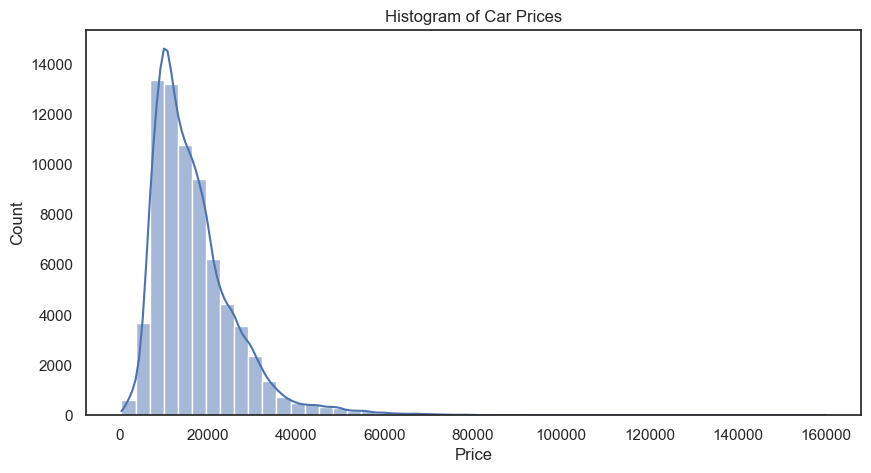

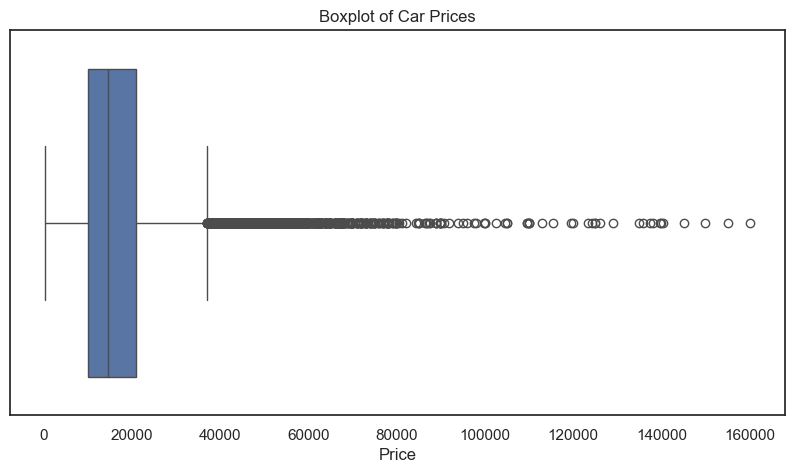

In [129]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_train['price'], bins=50, kde=True)
plt.title('Histogram of Car Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train['price'])
plt.title('Boxplot of Car Prices')
plt.xlabel('Price')
plt.show()

#### Price Observations
- No missing values or inconsistencies were found.
- Prices range from 450 to 159,999 dolars, with a mean of ~16,882 dolars and median of 14,699 dolars.
- A right-skewed price distribution was observed, with a small number of premium cars.
- These high-value vehicles are likely to be harder to predict accurately, as the model will be primarily trained on mid-range prices

## 2.13. Transmission

Checking Nan values.

In [130]:
# Sum of all Nan values of transmission variable.
df_train['transmission'].isna().sum()

np.int64(1996)

Checking Inconsistencies.

In [131]:
df_train['transmission'].unique()

array(['Semi-Auto', 'Manual', 'anual', 'Semi-Aut', 'Automatic', 'manual',
       nan, 'unknown', 'Manua', 'AUTOMATIC', 'MANUAL', 'semi-auto',
       ' Manual ', 'automatic', 'emi-Auto', 'SEMI-AUTO', 'SEMI-AUT',
       'Automati', 'ANUAL', 'unknow', 'utomatic', 'EMI-AUTO', 'manua',
       'anua', 'emi-Aut', 'MANUA', 'emi-auto', 'UTOMATIC', ' manual ',
       'UNKNOWN', 'nknown', 'automati', ' MANUAL ', 'Other', 'semi-aut',
       ' Manual', 'AUTOMATI', 'utomati', 'Manual ', 'manual ', 'nknow'],
      dtype=object)

Several typing errors were found—missing letters, inconsistent capitalization, etc. We will remove extra spaces and convert everything to uppercase.

In [132]:
# Remove leading/trailing spaces and uppercase all entries.
df_train['transmission'] = df_train['transmission'].str.strip().str.upper()

In [133]:
# Cheking all unique values after removing spaces and uppercase.
sorted(df_train['transmission'].dropna().astype(str).unique())

['ANUA',
 'ANUAL',
 'AUTOMATI',
 'AUTOMATIC',
 'EMI-AUT',
 'EMI-AUTO',
 'MANUA',
 'MANUAL',
 'NKNOW',
 'NKNOWN',
 'OTHER',
 'SEMI-AUT',
 'SEMI-AUTO',
 'UNKNOW',
 'UNKNOWN',
 'UTOMATI',
 'UTOMATIC']

In [134]:
transmission_values = ["automatic", "manual", "semi-auto", "other", "unknown"]
df_train["transmission"] = df_train["transmission"].apply(lambda x: fuzzy_to_domain(x, domain=transmission_values))

In [135]:
# Replace all 'unknown' and 'other' values in the 'transmission' column with NaN
df_train['transmission'] = df_train['transmission'].replace('unknown', np.nan)
df_train['transmission'] = df_train['transmission'].replace('other', np.nan)

In [136]:
# Checking the new number of Nan values.
df_train['transmission'].isna().sum()

np.int64(1996)

Visualizing 'transmission' on a countplot.

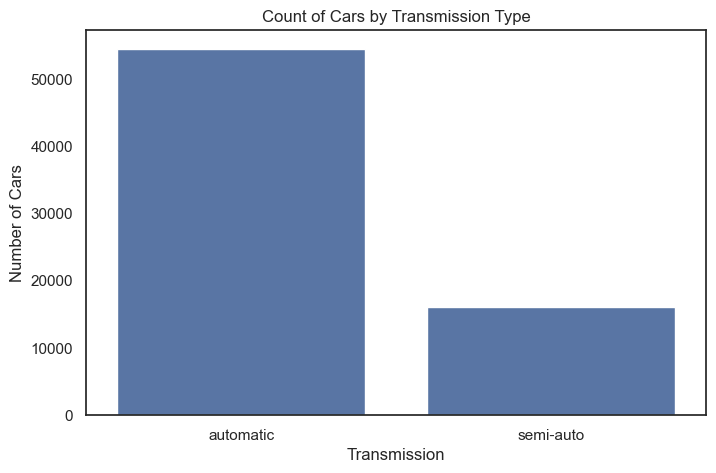

In [137]:
# Plot countplot of transmission types
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x='transmission', order=df_train['transmission'].value_counts().index)
plt.title('Count of Cars by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Number of Cars')
plt.show()

In [138]:
# Cheking the number of cars with 'OTHER' transmission
df_train[df_train['transmission'] == 'OTHER'].shape[0]

0

#### Transmission Observations
- Initially found 1,522 missing values.
- Typing errors were corrected and extra spaces removed.
- Final number of NaN values: 2,258.
- Entries with 'unknow' were converted to NaN.
- Most cars have Manual transmission, followed by Semi-Auto and Automatic.
- Only 5 cars have Other transmission types.

## 2.14. PaintQuality%

Checking Nan values.

In [139]:
# Check NaN values for paintQuality# column.
df_train['paintQuality%'].isna().sum()

np.int64(1994)

Checking Inconsistencies.

In [140]:
# Replace paintQuality% values above or equal to 3 and greater than 100 with NaN.
df_train.loc[(df_train['paintQuality%'] <= 3) | (df_train['paintQuality%'] > 100), 'paintQuality%'] = np.nan

In [141]:
# Round all remaining values to the nearest integer.
df_train['paintQuality%'] = df_train['paintQuality%'].round()

In [142]:
# Convert the column dtype to Int64 to handle integers with NaN values.
df_train['paintQuality%'] = df_train['paintQuality%'].astype('Int64')

In [143]:
df_train['paintQuality%'].unique()

<IntegerArray>
[  63,   50,   56,   97,   74,   75,   59,   85,   35,   68,   45,   30,   69,
   53,   57,   40,   60,   94,   33,   51,   47,   87,   61,   83,   95,   46,
   54,   80,   77,   90,   91,   71,   44,   38,   64,   55, <NA>,   82,   41,
   81,   79,   72,   34,   88,   43,   31,   96,   84,   70,   86,   92,   52,
   39,   42,   32,   73,   78,   37,   65,   93,   89,   99,   36,   66,   62,
    3,   67,   76,   48,   49,   98,   58]
Length: 72, dtype: Int64

In [144]:
# Check NaN values again.
df_train['paintQuality%'].isna().sum()

np.int64(2422)

Visualizing 'paintQuality%' on a histogram and boxplot.

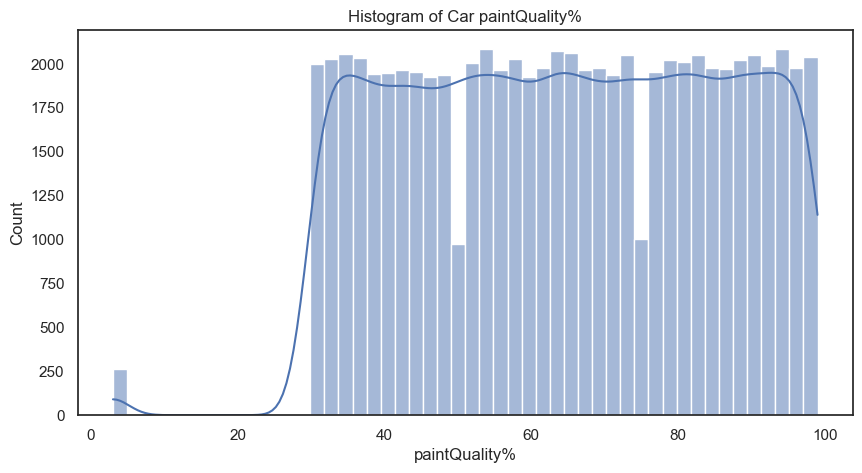

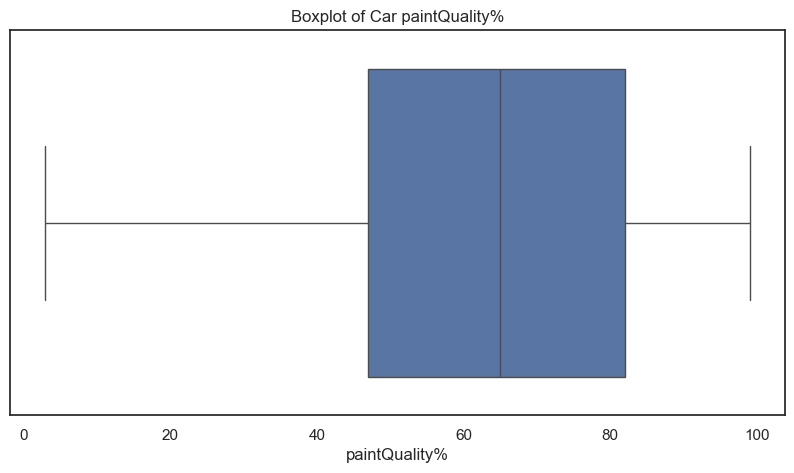

In [145]:
# Histogram
plt.figure(figsize=(10, 5))
sns.histplot(df_train['paintQuality%'], bins=50, kde=True)
plt.title('Histogram of Car paintQuality%')
plt.xlabel('paintQuality%')
plt.ylabel('Count')
plt.show()

# Boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_train['paintQuality%'])
plt.title('Boxplot of Car paintQuality%')
plt.xlabel('paintQuality%')
plt.show()

#### PaintQuality% Observations
- Initially, 1,524 NaN values were detected.
- Extreme outliers (1–3% and 125%) were considered errors and replaced with NaN.
- Some values had many decimals, so all were rounded to the nearest integer and dtype changed from float to Int64.
- Final number of NaNs: 2,250.
- After cleaning, the histogram and boxplot show a well-distributed variable with no outliers.

## Other

In [146]:
(df_train.isna().any(axis=1).mean() * 100).round(2)

np.float64(24.69)

In [147]:
(df_train.isna().mean() * 100).sort_values(ascending=False).round(2)

tax               11.60
mpg               11.18
paintQuality%      3.34
previousOwners     3.27
model              3.00
fuelType           2.94
engineSize         2.77
transmission       2.75
brand              0.82
price              0.76
year               0.76
carID              0.76
mileage            0.76
dtype: float64

# 3. Multivariate Analysis

#### Correlation Matrix for Numeric Variables

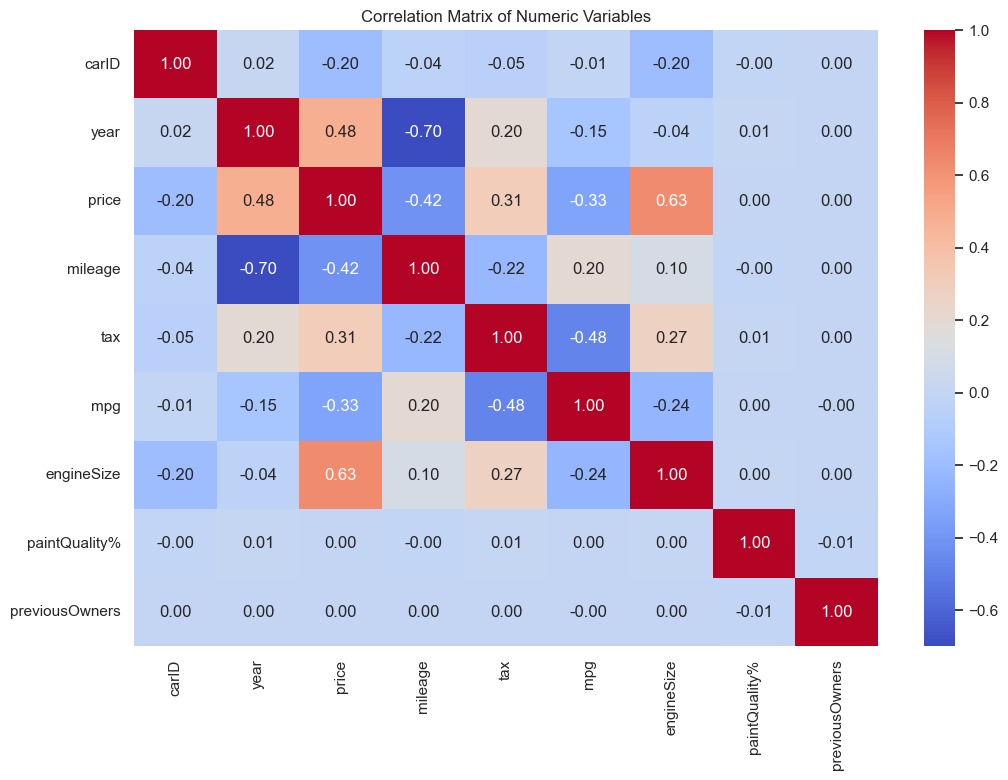

In [148]:
# Select only numeric columns
numeric_cols = df_train.select_dtypes(include=['int64', 'Int64', 'float64']).columns

# Compute correlation matrix
corr_matrix = df_train[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

- We will start to look into the variables that have 0 correlation with price since those probably are redudant and will be removed

#### Price & Car Id

In [149]:
# carId is just a label identifying each car so not relatable to anything and will be removed
df_train = df_train.drop(columns=['carID'])

#### Price & Previous Owners

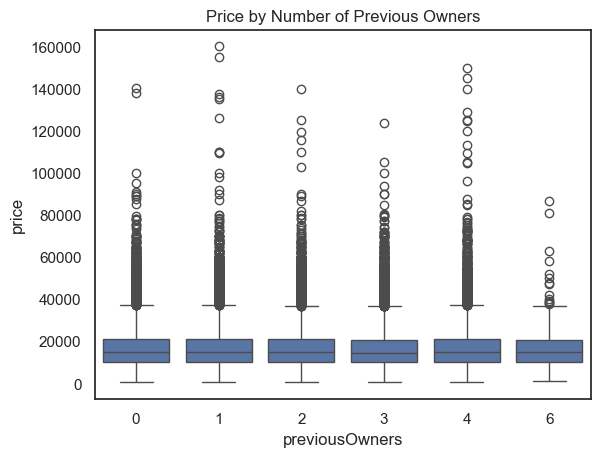

In [150]:
sns.boxplot(x='previousOwners', y='price', data=df_train)
plt.title('Price by Number of Previous Owners')
plt.show()

In [151]:
df_train.groupby('previousOwners')['price'].mean()

previousOwners
0    16875.711409
1    16946.069345
2    16898.476700
3    16793.826453
4    16988.547998
6    17017.270833
Name: price, dtype: float64

- The mean prices across ownership levels were nearly identical, indicating no meaningful predictive relationship

In [152]:
df_train.groupby('previousOwners')['mileage'].mean()

previousOwners
0    22999.241013
1     23533.70296
2     23122.54958
3    23683.039262
4    23023.105845
6    23422.699405
Name: mileage, dtype: Float64

- The variable however could be usefull to predict other missing values like milleage, but that seems also not to be the case since the correlation between this and all other variables is 0

In [153]:
# removing previousOwners because of the reasons pointed before
df_train = df_train.drop(columns=['previousOwners'])

#### Price & Paint Quality

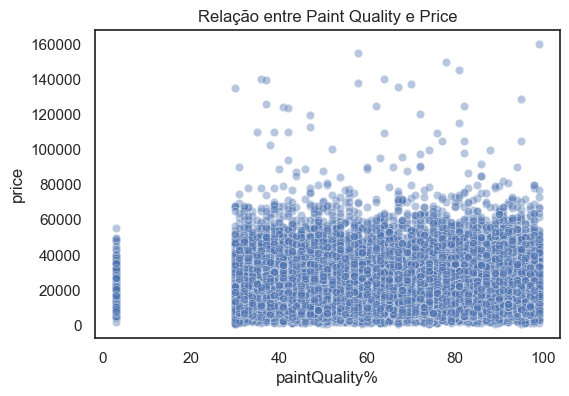

In [154]:
plt.figure(figsize=(6,4))
sns.scatterplot(x='paintQuality%', y='price', data=df_train, alpha=0.4)
plt.title('Relação entre Paint Quality e Price')
plt.show()

In [155]:
df_train = df_train.drop(columns=['paintQuality%'])

- The scenario is equal to before, paint quality has 0 correlation with all variables, its just noise, got removed

#### Price & Transmission Type

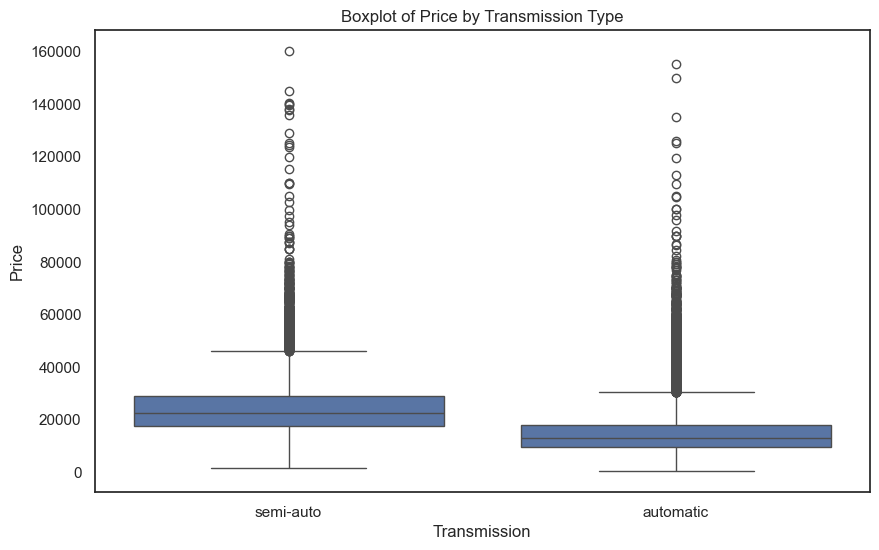

In [156]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='transmission', y='price', data=df_train)
plt.title("Boxplot of Price by Transmission Type")
plt.xlabel("Transmission")
plt.ylabel("Price")
plt.show()

- Manual cars are cheaper than Semi-Auto and Automatic in geral.
- Semi-Auto and Automatic cars can reach very high prices, up to 150,000, while Manual cars rarely exceed 60,000.

#### Price & Year 

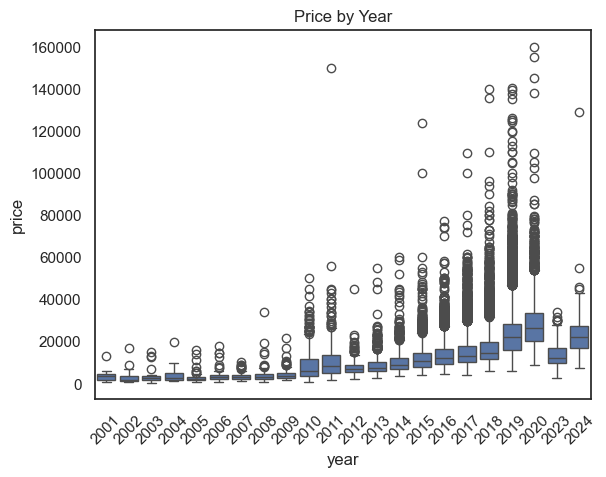

In [157]:
sns.boxplot(x='year', y='price', data=df_train)
plt.title('Price by Year')
plt.xticks(rotation=45)
plt.show()

#### Price & Mileage

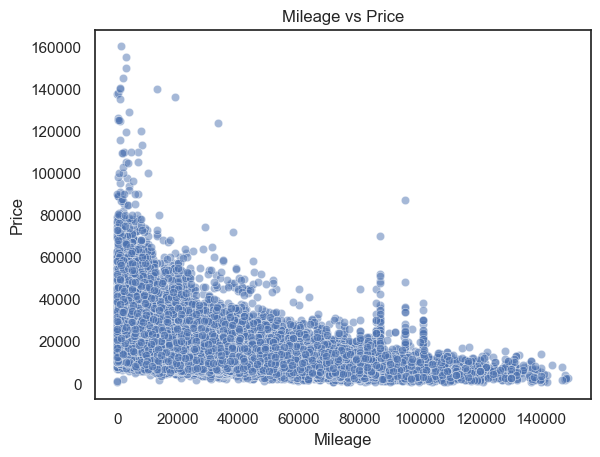

In [158]:
sns.scatterplot(x='mileage', y='price', data=df_train, alpha=0.5)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

- Higher mileage generally corresponds to lower prices, confirming the negative correlation
- The dataset contains a high proportion of vehicles with very low mileage

#### Price & Engine Size

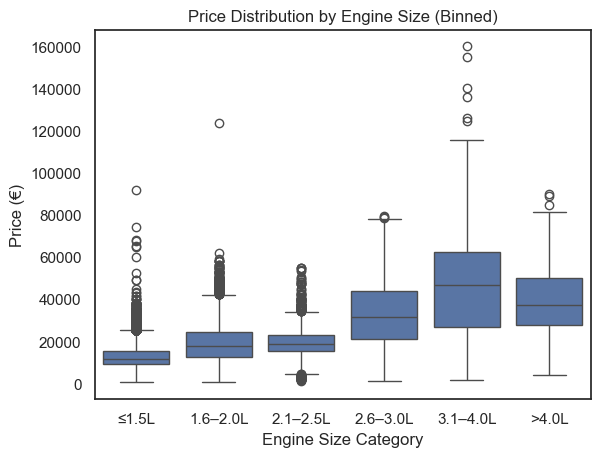

In [159]:
df_train['engine_bin'] = pd.cut(
    df_train['engineSize'],
    bins=[0, 1.5, 2.0, 2.5, 3.0, 4.0, 5.0],
    labels=['≤1.5L', '1.6–2.0L', '2.1–2.5L', '2.6–3.0L', '3.1–4.0L', '>4.0L']
)

sns.boxplot(x='engine_bin', y='price', data=df_train)
plt.title('Price Distribution by Engine Size (Binned)')
plt.xlabel('Engine Size Category')
plt.ylabel('Price (€)')
plt.show()


- There is an upward trend in vehicle price across engine size categories.
- Median prices and variability both increase with engine capacity, particularly above 2.5
- Above >4L the median price slightly decreases

#### Price & Brand

brand
mercedes    24519.034822
audi        22916.169170
bmw         22737.233287
vw          16883.959595
skoda       14260.076516
hyundai     12832.274828
ford        12581.390349
toyota      12461.484260
opel        10378.894801
Name: price, dtype: float64


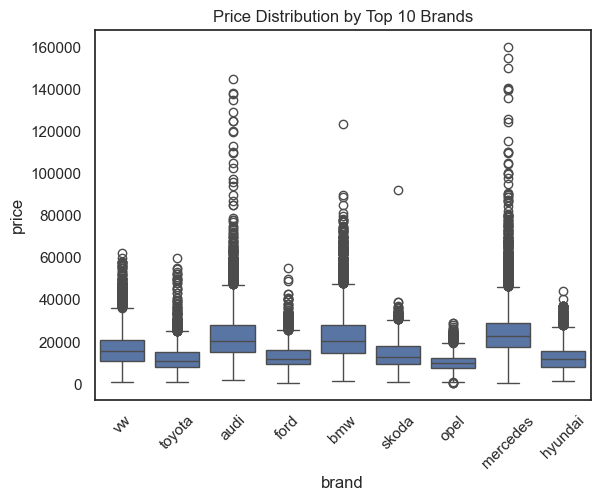

In [160]:
# Average price per brand
brand_price = df_train.groupby('brand')['price'].mean().sort_values(ascending=False)
print(brand_price.head(10))

# Boxplot of price by brand (top 10 brands by count)
top_brands = df_train['brand'].value_counts().head(10).index
sns.boxplot(x='brand', y='price', data=df_train[df_train['brand'].isin(top_brands)])
plt.title('Price Distribution by Top 10 Brands')
plt.xticks(rotation=45)
plt.show()

- Premium brands such as Audi, BMW, and Mercedes exhibit higher median prices and greater variability
- Toyota, Opel, and Hyundai display lower and more homogeneous prices
- Brand can be a strong categorical predictor of vehicle price

#### Price & fuel type

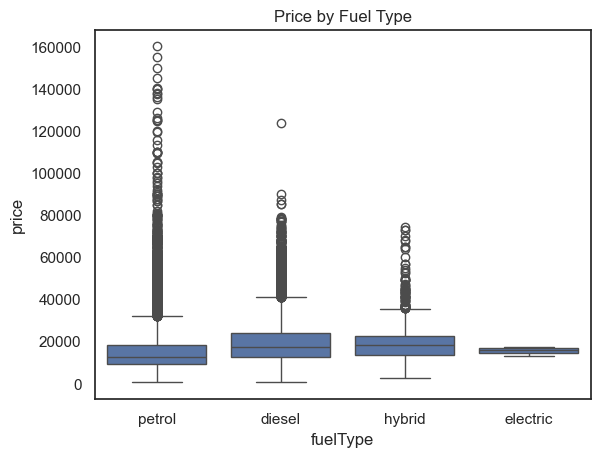

In [161]:
# Price distribution by fuel type
sns.boxplot(x='fuelType', y='price', data=df_train)
plt.title('Price by Fuel Type')
plt.show()

In [162]:
percent_missing_rows = df_train.isna().any(axis=1).mean() * 100
print(f"{percent_missing_rows:.2f}% of rows contain at least one missing value")


20.71% of rows contain at least one missing value


In [163]:
df_train.columns

Index(['brand', 'model', 'year', 'price', 'transmission', 'mileage',
       'fuelType', 'tax', 'mpg', 'engineSize', 'engine_bin'],
      dtype='object')

In [164]:
(df_train.isna().mean() * 100).sort_values(ascending=False).head(10)

tax             11.600110
mpg             11.180116
model            3.003305
fuelType         2.935830
engine_bin       2.862848
engineSize       2.770587
transmission     2.748554
brand            0.817956
year             0.761498
mileage          0.761498
dtype: float64